# Prelude

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import re
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
%time
#BHSa2021 = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')
#BHSa4c = use('etcbc/bhsa', version="c", mod='CenterBLC/BHSaddons/tf')
#DSS = use('etcbc/dss', hoist=globals())
NA = use("CenterBLC/NA", version="1904")

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


This is Text-Fabric 11.0.2
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

74 features found and 0 ignored
  0.01s Dataset without structure sections in otext:no structure functions in the T-API
  0.07s All features loaded/computed - for details use TF.isLoaded()
  0.58s All additional features loaded - for details use TF.isLoaded()


# BOL exercises
## vocab selection
First we want to indentify of each word only three instances in the N1904. The aim is to get three `bol_monad` numbers for each lemma. This list we will then use for our BOL vocab exercises.

In [5]:
# word lex* bol_dict_HebArm* number* freq_occ>2000 rank_occ* bol_dict_abc* language=Hebrew
GreekWordRank_BibleOL_Vocab_N1904='''
word bol_monad_num bol_lemma bol_surface bol_gloss_EN bol_lemma_dict bol_lemma_occ bol_frequency_rank bol_surface bol_dict_abc vocab_builder

'''
GreekWordRank_BibleOL_Vocab_N1904  = NA.search(GreekWordRank_BibleOL_Vocab_N1904)
NA.show(GreekWordRank_BibleOL_Vocab_N1904, start=1, end=23, condensed=True, colorMap={1: 'cyan'})

  0.45s 137779 results


In [6]:
NA.export(GreekWordRank_BibleOL_Vocab_N1904, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek', toFile='GreekWordRank_BibleOL_Vocab_N1904.tsv')

In [7]:
GreekWordRank_BibleOL_Vocab_N1904=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/GreekWordRank_BibleOL_Vocab_N1904.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
GreekWordRank_BibleOL_Vocab_N1904.head()

R       S1  S2  S3  NODE1 TYPE1      TEXT1  bol_dict_abc1  \
0  1  Matthew   1   1      1  word    Βίβλος             969   
1  2  Matthew   1   1      2  word  γενέσεως            1070   
2  3  Matthew   1   1      3  word     Ἰησοῦ            2399   
3  4  Matthew   1   1      4  word   Χριστοῦ            5358   
4  5  Matthew   1   1      5  word      υἱοῦ            5026   

   bol_frequency_rank1                  bol_gloss_EN1 bol_lemma1  \
0                 1052  written book, roll, or volume     βίβλος   
1                 1638                 birth, lineage    γένεσις   
2                   19                          Jesus     Ἰησοῦς   
3                   35      anointed, Messiah, Christ    Χριστός   
4                   47                son, descendent       υἱός   

    bol_lemma_dict1  bol_lemma_occ1  bol_monad_num1 bol_surface1  \
0    βίβλος, -ου, ἡ              10               1       Βίβλος   
1  γένεσις, -εως, ἡ               5               2     γενέσεως   
2            Ἰησοῦς             913               3        Ἰησοῦ   
3   Χριστός, -οῦ, ὁ             529               4      Χριστοῦ   
4      υἱός, -οῦ, ὁ             376               5         υἱοῦ   

  vocab_builder1  
0           6.i.  
1         absent  
2           1.a.  
3           1.b.  
4           1.c.

### Sequenced Selection of 3 per lemma

In [8]:
GreekWordRank_BibleOL_Vocab_N1904_selection1=GreekWordRank_BibleOL_Vocab_N1904.groupby('bol_lemma1').nth((0,1,2)).sort_values(['bol_frequency_rank1','bol_dict_abc1'], ascending=True)

In [9]:
GreekWordRank_BibleOL_Vocab_N1904_selection1.head()

R       S1  S2  S3  NODE1 TYPE1 TEXT1  bol_dict_abc1  \
bol_lemma1                                                           
ὁ            11  Matthew   1   2     11  word  τὸν            3438   
ὁ            16  Matthew   1   2     16  word  τὸν            3438   
ὁ            21  Matthew   1   2     21  word  τὸν            3438   
καί          32  Matthew   1   3     32  word  καὶ            2506   
καί         165  Matthew   1  11    165  word  καὶ            2506   

            bol_frequency_rank1            bol_gloss_EN1 bol_lemma_dict1  \
bol_lemma1                                                                 
ὁ                             1                      the        ὁ, ἡ, τό   
ὁ                             1                      the        ὁ, ἡ, τό   
ὁ                             1                      the        ὁ, ἡ, τό   
καί                           2  and, even, also, namely             καί   
καί                           2  and, even, also, namely             καί   

            bol_lemma_occ1  bol_monad_num1 bol_surface1 vocab_builder1  
bol_lemma1                                                              
ὁ                    19783              11          τὸν           1.a.  
ὁ                    19783              16          τὸν           1.a.  
ὁ                    19783              21          τὸν           1.a.  
καί                   8978              32          καὶ           1.a.  
καί                   8978             165          καὶ           1.a.

In [10]:
GreekWordRank_BibleOL_Vocab_N1904_selection1.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/GreekWordRank_BibleOL_Vocab_N1904_1st-3rdOccPerWord_sequenced.xlsx')

### Random Selection of 3 per lemma

In [11]:
GreekWordRank_BibleOL_Vocab_N1904_selection2=GreekWordRank_BibleOL_Vocab_N1904.groupby('bol_lemma1').sample(n=3, replace=True).sort_values(['bol_frequency_rank1','bol_dict_abc1'], ascending=True)

In [12]:
GreekWordRank_BibleOL_Vocab_N1904_selection2.head()

R             S1  S2  S3   NODE1 TYPE1  TEXT1  bol_dict_abc1  \
134708  134709     Revelation  16  21  134709  word  τοὺς            3438   
104878  104879      Ephesians   4   9  104879  word    τὰ            3438   
90913    90914  I_Corinthians   2  14   90914  word   τοῦ            3438   
40883    40884           Luke  13  17   40884  word   καὶ            2506   
120437  120438          James   1   5  120438  word   καὶ            2506   

        bol_frequency_rank1            bol_gloss_EN1 bol_lemma1  \
134708                    1                      the          ὁ   
104878                    1                      the          ὁ   
90913                     1                      the          ὁ   
40883                     2  and, even, also, namely        καί   
120437                    2  and, even, also, namely        καί   

       bol_lemma_dict1  bol_lemma_occ1  bol_monad_num1 bol_surface1  \
134708        ὁ, ἡ, τό           19783          134709         τοὺς   
104878        ὁ, ἡ, τό           19783          104879           τὰ   
90913         ὁ, ἡ, τό           19783           90914          τοῦ   
40883              καί            8978           40884          καὶ   
120437             καί            8978          120438          καὶ   

       vocab_builder1  
134708           1.a.  
104878           1.a.  
90913            1.a.  
40883            1.a.  
120437           1.a.

In [13]:
GreekWordRank_BibleOL_Vocab_N1904_selection2.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/GreekWordRank_BibleOL_Vocab_N1904_1st-3rdOccPerWord_random.xlsx')

## Relevant clauses per Vocab Section

In [14]:
Search0 = '''
w1:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w2:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w3:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w4:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w5:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w6:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w7:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w8:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w9:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN



'''
Search0 = NA.search(Search0)
NA.show(Search0, start=1, end=50, condensed=True, colorMap={1:'pink'}, extraFeatures={'abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss_EN', 'bol_gender', 'bol_lemma', 'bol_lemma_dict'})

  2.20s 24 results


In [15]:
NA.export(Search0, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek', toFile='BOL_Translation_vocab-builder_1.a.tsv')

In [16]:
Search0 = '''
w1:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w2:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w3:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w4:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w5:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w6:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w7:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w8:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w9:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w10:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w11:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w12:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w13:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w14:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w15:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w16:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w17:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w18:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w19:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w20:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w21:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w22:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w23:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN
<: w24:word bol_surface vocab_builder=1.a. bol_lemma bol_monad_num bol_gloss_EN


'''
Search0 = NA.search(Search0)
NA.show(Search0, start=1, end=50, condensed=True, colorMap={1:'pink'}, extraFeatures={'abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss_EN', 'bol_gender', 'bol_lemma', 'bol_lemma_dict'})

  5.82s 0 results


# Greek Vocabulary Builder Statistics
## Stats on the N1904 data

In [18]:
N1904=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.53_20230105.xlsx', sheet_name='Sheet1')
#VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
pd.set_option('display.max_columns', 50)
N1904.head()

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0   Matthew        1       Matt        1      1  Matt 1:1           1   
1   Matthew        1       Matt        1      1  Matt 1:1           2   
2   Matthew        1       Matt        1      1  Matt 1:1           3   
3   Matthew        1       Matt        1      1  Matt 1:1           4   
4   Matthew        1       Matt        1      1  Matt 1:1           5   

   bol_monad_num      word bol_surface normalized normalized_noaccent  \
0              1    Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1              2  γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2              3     Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3              4   Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4              5      υἱοῦ        υἱοῦ       υἱοῦ                υιου   

     lemma bol_lemma lemma_noaccent lemma_translit form_tag functional_tag  \
0   βίβλος    βίβλος         βιβλος         biblos    N-NSF          N-NSF   
1  γένεσις   γένεσις        γενεσις        genesis    N-GSF          N-GSF   
2   Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous    N-GSM          N-GSM   
3  Χριστός   Χριστός        Χριστος       Khristos    N-GSM          N-GSM   
4     υἱός      υἱός           υιος           uios    N-GSM          N-GSM   

   strongs  strongs_unreliable        lemma_dict    bol_lemma_dict  \
0      976               False    βίβλος, -ου, ἡ    βίβλος, -ου, ἡ   
1     1078               False  γένεσις, -εως, ἡ  γένεσις, -εως, ἡ   
2     2424               False            Ἰησοῦς            Ἰησοῦς   
3     5547               False   Χριστός, -οῦ, ὁ   Χριστός, -οῦ, ὁ   
4     5207               False      υἱός, -οῦ, ὁ      υἱός, -οῦ, ὁ   

                        gloss_EN                   bol_gloss_EN  abc_order  \
0  written book, roll, or volume  written book, roll, or volume        965   
1                 birth, lineage                 birth, lineage       1067   
2                          Jesus                          Jesus       2387   
3      anointed, Messiah, Christ      anointed, Messiah, Christ       5326   
4                son, descendent                son, descendent       4995   

   ...  bol_mood  degree  extra  bol_suffix bol_verb_type bol_noun_stem  \
0  ...       NaN     NaN    NaN         NaN           NaN       omicron   
1  ...       NaN     NaN    NaN         NaN           NaN          iota   
2  ...       NaN     NaN    NaN         NaN           NaN     irregular   
3  ...       NaN     NaN    NaN         NaN           NaN       omicron   
4  ...       NaN     NaN    NaN         NaN           NaN       omicron   

   word_stem declension bol_noun_declension vocab_ReadGreekIn30Days  \
0        NaN        2nd            second_d             not_covered   
1       iota        3rd             third_d             not_covered   
2  irregular  irregular           irregular             not_covered   
3        NaN        2nd            second_d             not_covered   
4        NaN        2nd            second_d                      3b   

  vocab_builder alt_morphology verb_class   vanVoorst_lemma  \
0          6.i.            NaN        NaN    βίβλος, -ου, ἡ   
1        absent            NaN        NaN  γένεσις, -εως, ἡ   
2          1.a.            NaN        NaN    Ἰησοῦς, -οῦ, ὁ   
3          1.b.         NSgGen        NaN   Χριστός, -οῦ, ὁ   
4          1.c.         NSgGen        NaN      υἱός, -οῦ, ὁ   

                                     vanVoorst_gloss vanVoorst_comments  \
0                                               book            (Bible)   
1                                          beginning          (genesis)   
2                                      Jesus, Joshua         no-comment   
3  the Anointed One, the Messiah, the Christ [cf....         no-comment   
4                                                son         no-comment   

  Unnamed: 62 vanVoorst_subsection    vanVoorst_root AU_v

array([<AxesSubplot:ylabel='orig_order'>], dtype=object)

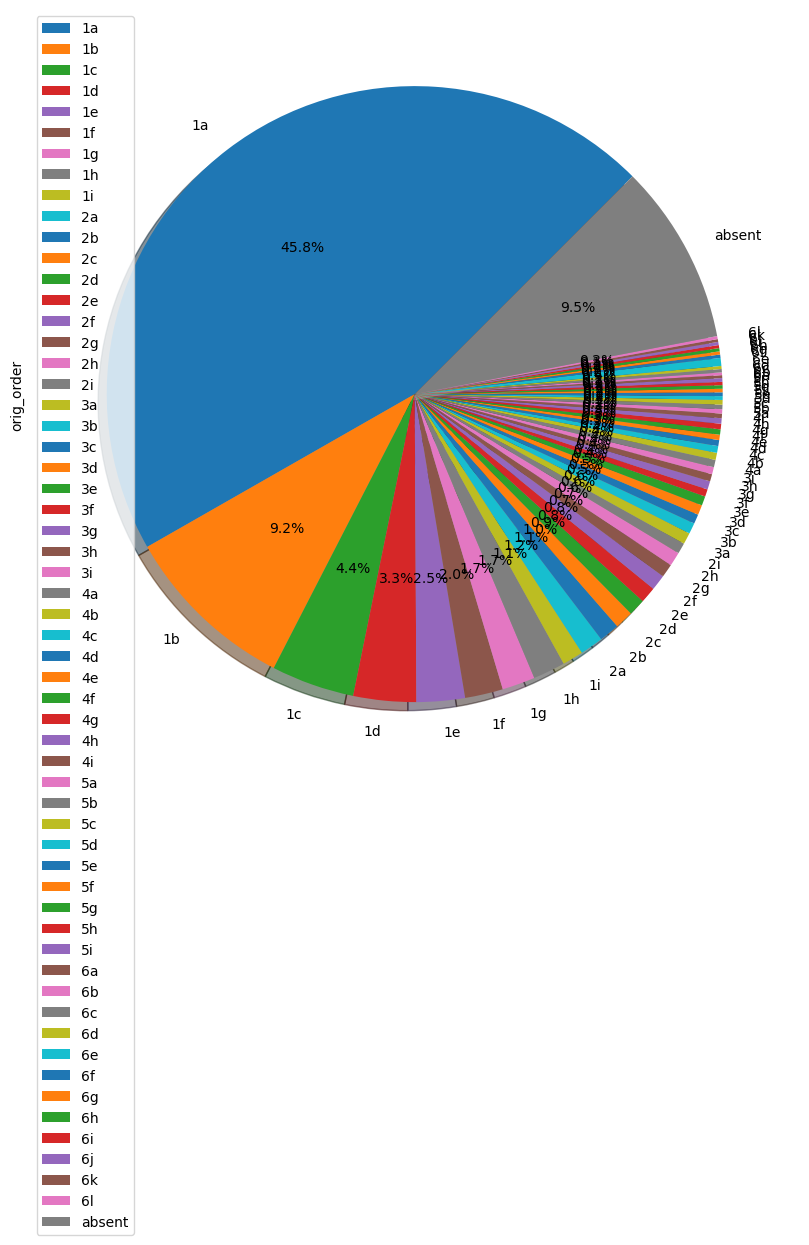

In [19]:
N1904.groupby(['AU_vocab_builder_chapter']).sum().plot(kind='pie', y='orig_order', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

In [20]:
def combiningsubsections(row):
    if re.search('^1.*', str(row)):
        return 'Section no.1'    
    if re.search('^2.*', str(row)):
        return 'Section no.2'    
    if re.search('^3.*', str(row)):
        return 'Section no.3'     
    if re.search('^4.*', str(row)):
        return 'Section no.4'    
    if re.search('^5.*', str(row)):
        return 'Section no.5'    
    if re.search('^6.*', str(row)):
        return 'Section no.6' 
    if re.search('absent', str(row)):
        return 'absent' 
    else:
        return ''

In [21]:
N1904['SectionCombined']=N1904['AU_vocab_builder_chapter'].apply(combiningsubsections)

In [22]:
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

array([<AxesSubplot:ylabel='orig_order'>], dtype=object)

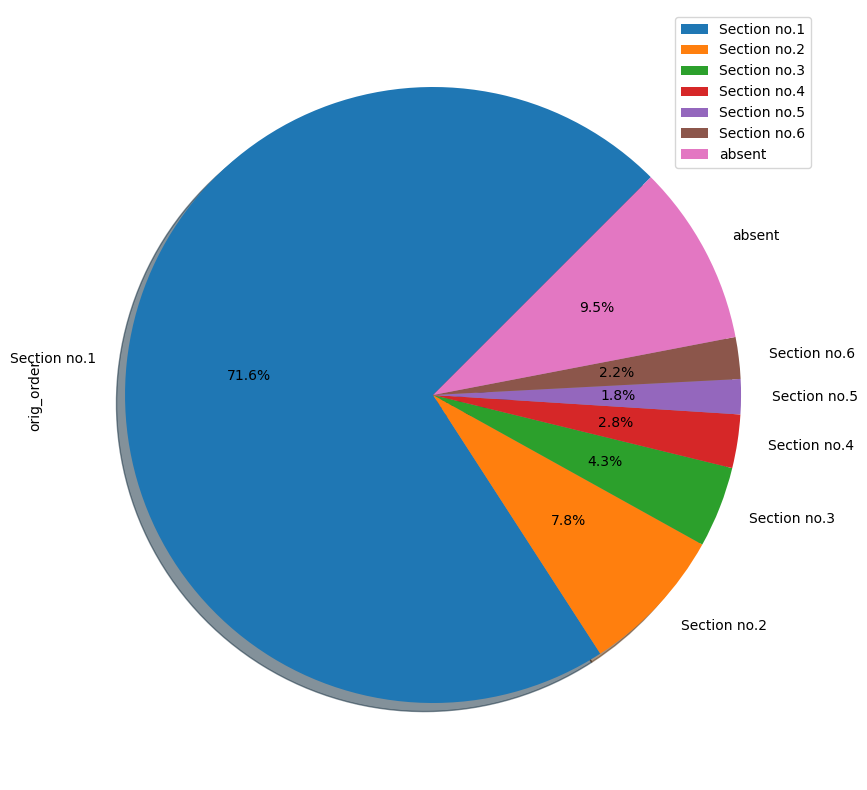

In [23]:
N1904.groupby(['SectionCombined']).sum().plot(kind='pie', y='orig_order', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

## Stats on the Greek Dictionary

In [24]:
GreekDict=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/GLI/BibleOL_translation-project_dictionary_Hebrew-Aramaic-Greek/BibleOL_N1904_dictionary_Greek-English_v1.03.xlsx', sheet_name='BOL-N1904_dictionary_20230101')
#VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
pd.set_option('display.max_columns', 50)
GreekDict.head()

orig_abc_order  orig_freq_order  Occurrences Lexeme    Lexeme_dict  \
0            3438                1        19783      ὁ       ὁ, ἡ, τό   
1            2506                2         8978    καί            καί   
2             839                3         5550  αὐτός  αὐτός, -ή, -ό   
3            4603                4         2892     σύ             σύ   
4            1152                5         2787     δέ             δέ   

  lemma_translit vanVoorst_lemma  Strong's number Strong's unreliable?  \
0              o        ὁ, ἡ, τό             3588                   no   
1            kai             καί             2532                   no   
2          autos   αὐτός, -ή, -ό              846                   no   
3             su              σύ             4771                   no   
4             de              δέ             1161                   no   

  part_of_speech                  gloss_English  orig_freq_order.1  \
0        article                            the                  1   
1     conjuction        and, even, also, namely                  2   
2    preposition  he, she, it, they, them, same                  3   
3    preposition                            you                  4   
4     conjuction    but, on the other hand, and                  5   

   vanVoorst_orig_order                                  vanVoorst_glosses  \
0                 395.0                                                the   
1                 266.0                                and, also, likewise   
2                  45.0  he, she, it; himself, herself, itself; even, v...   
3                 528.0                                                you   
4                4341.0                 but, and (frequently untranslated)   

                         vanVoorst glosses without I gloss differences  \
0                                                the               the   
1                                and, also, likewise               NaN   
2  he, she, it; himself, herself, itself; even, v...               NaN   
3                                                you               you   
4                 but, and (frequently untranslated)               NaN   

  combined vanVoorst_comments vanVoorst_sp    sp declination stem  \
0      NaN         no-comment          NaN   art         NaN  NaN   
1      NaN         no-comment  conjunction  conj         NaN  NaN   
2      NaN       (automobile)          NaN  prep         NaN  NaN   
3      NaN         no-comment          NaN  prep         NaN  NaN   
4      NaN         no-comment  conjunction  conj         NaN  NaN   

  vanVoorst_chapter  vanVoorst_subsection vanVoorst_roots  \
0            III.A.                   6.0        ὁ, ἡ, τό   
1            III.A.                   4.0             καί   
2            III.A.                   1.0   αὐτός, -ή, -ό   
3            III.A.                   7.0              σύ   
4             IV.A.                   NaN             NaN   

  comments_on_vanVoorst ReadGreekIn30Days  teresa_order  \
0                   NaN                3a          23.0   
1                   NaN                3a          16.0   
2                   NaN                3a           6.0   
3                   NaN                3b          52.0   
4                   NaN                3a           9.0   

  AU_vocab_builder_chapter       import VLOOKUP  
0                       1a                  NaN  
1                       1a  and, also, likewise  
2                       1a                  NaN  
3                       1a                  NaN  
4                       1a                  NaN

array([<AxesSubplot:ylabel='orig_abc_order'>], dtype=object)

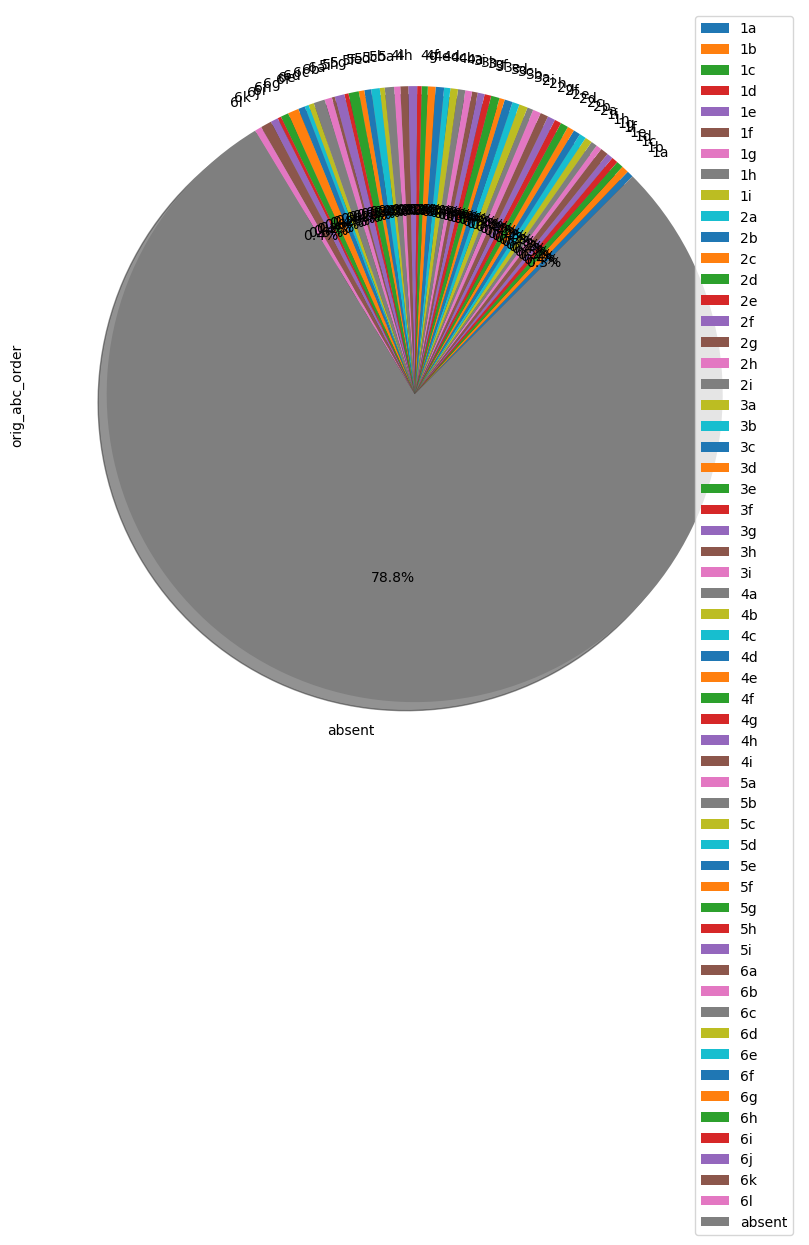

In [25]:
GreekDict.groupby(['AU_vocab_builder_chapter']).sum().plot(kind='pie', y='orig_abc_order', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

In [26]:
def combiningsubsections(row):
    if re.search('^1.*', str(row)):
        return 'Section no.1'    
    if re.search('^2.*', str(row)):
        return 'Section no.2'    
    if re.search('^3.*', str(row)):
        return 'Section no.3'     
    if re.search('^4.*', str(row)):
        return 'Section no.4'    
    if re.search('^5.*', str(row)):
        return 'Section no.5'    
    if re.search('^6.*', str(row)):
        return 'Section no.6' 
    if re.search('absent', str(row)):
        return 'absent' 
    else:
        return ''

In [27]:
GreekDict['SectionCombined']=GreekDict['AU_vocab_builder_chapter'].apply(combiningsubsections)

array([<AxesSubplot:ylabel='orig_abc_order'>], dtype=object)

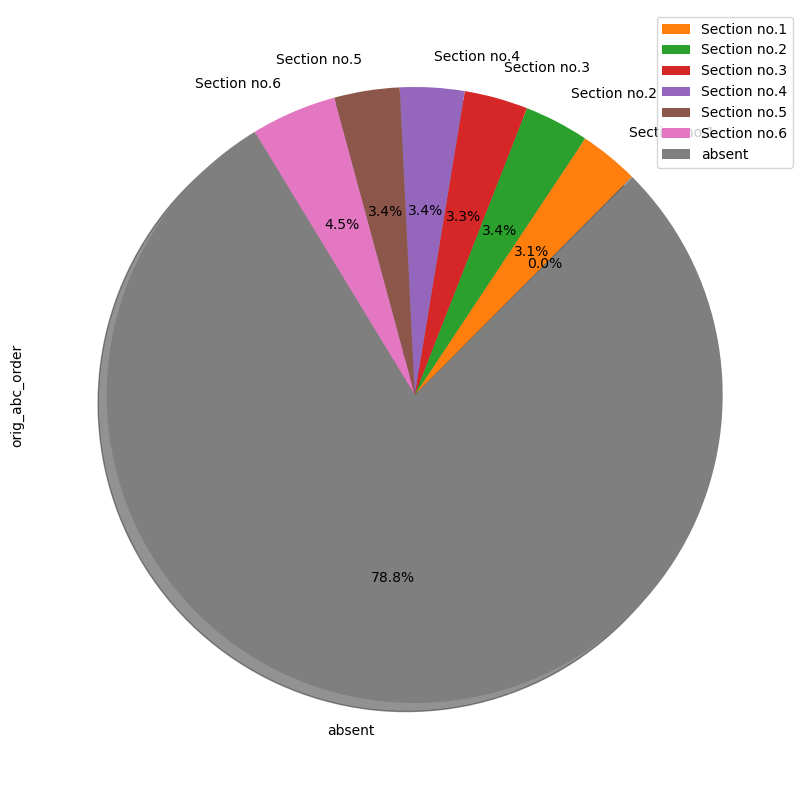

In [28]:
GreekDict.groupby(['SectionCombined']).sum().plot(kind='pie', y='orig_abc_order', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

In [29]:
NotInBooklet=GreekDict[GreekDict['AU_vocab_builder_chapter'].str.contains('absent', na=False)] 

In [30]:
InBooklet=GreekDict[GreekDict['AU_vocab_builder_chapter'].str.contains('1.', na=False) | 
                    GreekDict['AU_vocab_builder_chapter'].str.contains('2.', na=False) |
                    GreekDict['AU_vocab_builder_chapter'].str.contains('3.', na=False) |
                    GreekDict['AU_vocab_builder_chapter'].str.contains('4.', na=False) |
                    GreekDict['AU_vocab_builder_chapter'].str.contains('5.', na=False) |
                    GreekDict['AU_vocab_builder_chapter'].str.contains('6.', na=False)
                   ]

<AxesSubplot:ylabel='AU_vocab_builder_chapter'>

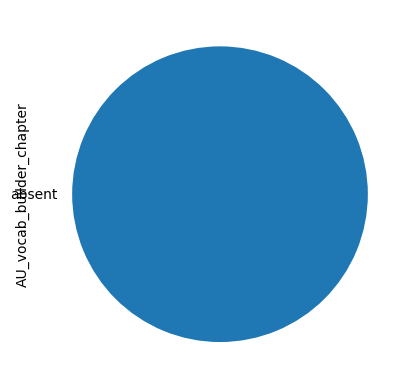

In [31]:
NotInBooklet['AU_vocab_builder_chapter'].value_counts().plot(kind='pie')


<AxesSubplot:ylabel='AU_vocab_builder_chapter'>

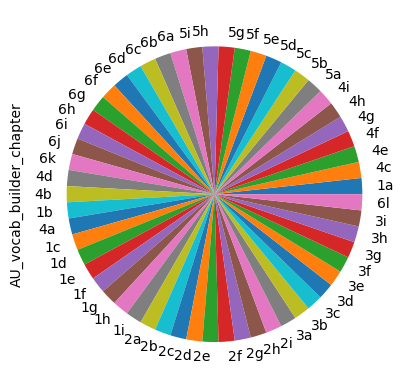

In [32]:
InBooklet['AU_vocab_builder_chapter'].value_counts().plot(kind='pie')


In [33]:
InBookletCounts=InBooklet['AU_vocab_builder_chapter'].value_counts()
NotInBookletCounts=NotInBooklet['AU_vocab_builder_chapter'].value_counts()

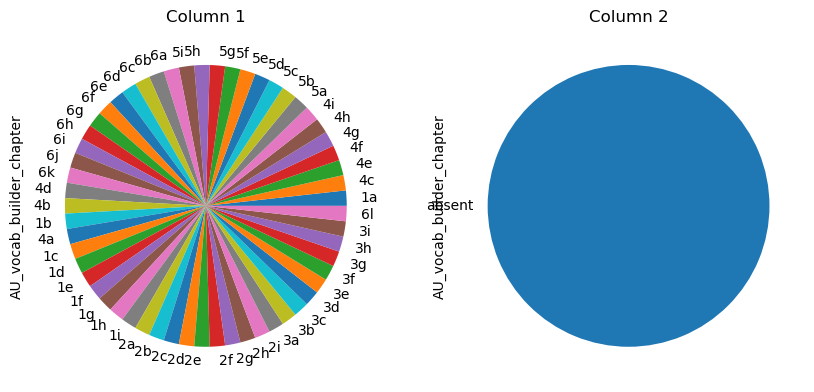

In [34]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the first pie plot
InBookletCounts.plot(kind='pie', ax=ax1, title='Column 1')

# Create the second pie plot
NotInBookletCounts.plot(kind='pie', ax=ax2, title='Column 2')

# Show the plot
plt.show()

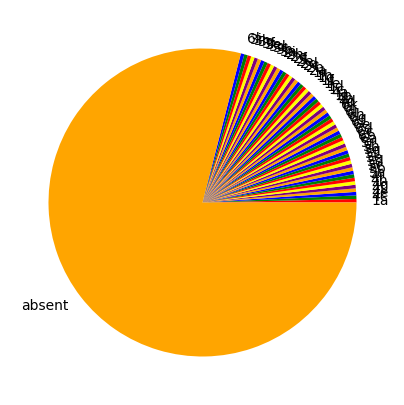

In [35]:
# Get the value counts for the two columns
column1_counts = InBookletCounts
column2_counts = NotInBookletCounts

# Combine the value counts into a single series
combined_counts = pd.concat([column1_counts,column2_counts])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Create the pie plot
ax.pie(combined_counts, labels=combined_counts.index, colors=['red', 'green', 'blue', 'orange', 'purple', 'yellow'])

# Show the plot
plt.show()

In [36]:
SectionNo1 = GreekDict[(GreekDict['AU_vocab_builder_chapter'].str.contains('^1.', na=False))].sort_values(['orig_abc_order'], ascending=[True])
len(SectionNo1)

180

In [37]:
SectionNo2 = GreekDict[(GreekDict['AU_vocab_builder_chapter'].str.contains('^2.', na=False))].sort_values(['orig_abc_order'], ascending=[True])
len(SectionNo2)

180

In [38]:
SectionNo3 = GreekDict[(GreekDict['AU_vocab_builder_chapter'].str.contains('^3.', na=False))].sort_values(['orig_abc_order'], ascending=[True])
len(SectionNo3)

180

In [39]:
SectionNo4 = GreekDict[(GreekDict['AU_vocab_builder_chapter'].str.contains('^4.', na=False))].sort_values(['orig_abc_order'], ascending=[True])
len(SectionNo4)

180

In [40]:
SectionNo5 = GreekDict[(GreekDict['AU_vocab_builder_chapter'].str.contains('^5.', na=False))].sort_values(['orig_abc_order'], ascending=[True])
len(SectionNo5)

180

In [41]:
SectionNo6 = GreekDict[(GreekDict['AU_vocab_builder_chapter'].str.contains('^6.', na=False))].sort_values(['orig_abc_order'], ascending=[True])
len(SectionNo6)

240

In [42]:
SectionNoAbsent = GreekDict[(GreekDict['AU_vocab_builder_chapter'].str.contains('^abs', na=False))].sort_values(['orig_abc_order'], ascending=[True])
len(SectionNoAbsent)

4292

In [43]:
TotalNumberOfVocabInBooklet = len(SectionNo1) + len(SectionNo2) + len(SectionNo3) + len(SectionNo4) + len(SectionNo5) + len(SectionNo6)
print(TotalNumberOfVocabInBooklet)

1140


In [44]:
TotalNumberOfVocab = len(SectionNo1) + len(SectionNo2) + len(SectionNo3) + len(SectionNo4) + len(SectionNo5) + len(SectionNo6) + len(SectionNoAbsent)
print(TotalNumberOfVocab)

5432


In [45]:
x=100/TotalNumberOfVocab*TotalNumberOfVocabInBooklet
x

20.986745213549337

# SOUND PRODUCTION
lets create first a sample DF of only 10 entries.

In [46]:
from gtts import gTTS

text = "Γειά σου κόσμε"
tts = gTTS(text, lang='el')
tts.save("hello.mp3")


In [ ]:
GreekDict=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/GLI/BibleOL_translation-project_dictionary_Hebrew-Aramaic-Greek/BibleOL_N1904_dictionary_Greek-English_v1.02.xlsx', sheet_name='BOL-N1904_dictionary_20221228')
#VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
pd.set_option('display.max_columns', 50)
GreekDict.head()

In [ ]:
GreekDict.head(5)

In [ ]:
GreekDict = GreekDict.sort_values(['orig abc order'], ascending=[True])
GreekDict.head(10)

In [ ]:
GreekSounds=GreekDict[['orig abc order','Lexeme']]

In [ ]:
GreekSounds.head()

Lets create a small sample with just 10 words file:

In [ ]:
GreekSoundsSample = GreekSounds.head(10)

In [ ]:
GreekSoundsSample.head(20)

## Exporting the audio as MP3 files

### Sample Run

In [ ]:
for index, row in GreekSoundsSample.iterrows():
    word = row["Lexeme"]
    tts = gTTS(word, lang='el')
    #tts.save(f"/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/mp3/{word}.mp3")
    tts.save(f"/Users/oliverglanz/Desktop/mp3/{word}.mp3")
#The output is being saved in:
#/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek
#since this is where this jupyter notebook is located.

In [ ]:
#We can do the same but add a counter to the beginning of the file name:

counter = 0
for index, row in GreekSoundsSample.iterrows():
    word = row["Lexeme"]
    tts = gTTS(word, lang='el')
    counter += 1    
    #tts.save(f"/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/mp3/{counter}_ABC-order_{word}.mp3")
    tts.save(f"/Users/oliverglanz/Desktop/mp3/{counter:04d}_ABC-order_{word}.mp3")

#I am using the "04d" option for the counter in order to start the count of the words with 0001 instead of 1.    
    
#The output is being saved in:
#/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek
#since this is where this jupyter notebook is located.

In [ ]:
GreekSoundsSample.head()

#### Full Run

In [ ]:
#We can do the same but add a counter to the beginning of the file name:

counter = 0
for index, row in GreekSounds.iterrows():
    word = row["Lexeme"]
    tts = gTTS(word, lang='el')
    counter += 1    
    #tts.save(f"/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/mp3/{counter}_ABC-order_{word}.mp3")
    tts.save(f"/Users/oliverglanz/Desktop/mp3/{counter:04d}_ABC-order_{word}.mp3")

#I am using the "04d" option for the counter in order to start the count of the words with 0001 instead of 1.    
    
#The output is being saved in:
#/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek
#since this is where this jupyter notebook is located.

the gTTS shuts down when it gets too many requests. In our case it ended with the Greek word no 1901 (in the alphabetic order). Since we want to continue with word no 1902 we are going to start the dataframe with that word no 1902 and adapt the counter accordingly.

In [ ]:
GreekSounds2 = GreekDict[GreekDict["orig abc order"] >= 1902]
GreekSounds2.head()

In [ ]:
GreekSounds2=GreekSounds2[['orig abc order','Lexeme']]
GreekSounds2.head()

In [ ]:
#We can do the same but add a counter to the beginning of the file name:

counter = 1901
for index, row in GreekSounds2.iterrows():
    word = row["Lexeme"]
    tts = gTTS(word, lang='el')
    counter += 1    
    #tts.save(f"/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/mp3/{counter}_ABC-order_{word}.mp3")
    tts.save(f"/Users/oliverglanz/Desktop/mp3/{counter:04d}_ABC-order_{word}.mp3")

#I am using the "04d" option for the counter in order to start the count of the words with 0001 instead of 1.    
    
#The output is being saved in:
#/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek
#since this is where this jupyter notebook is located.

In [ ]:
GreekSounds3 = GreekDict[GreekDict["orig abc order"] >= 5411]
GreekSounds3.head()

In [ ]:
GreekSounds3=GreekSounds3[['orig abc order','Lexeme']]
GreekSounds3.head()

In [ ]:
#We can do the same but add a counter to the beginning of the file name:

counter = 5410
for index, row in GreekSounds3.iterrows():
    word = row["Lexeme"]
    tts = gTTS(word, lang='el')
    counter += 1    
    #tts.save(f"/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/mp3/{counter}_ABC-order_{word}.mp3")
    tts.save(f"/Users/oliverglanz/Desktop/mp3/{counter:04d}_ABC-order_{word}.mp3")

#I am using the "04d" option for the counter in order to start the count of the words with 0001 instead of 1.    
    
#The output is being saved in:
#/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek
#since this is where this jupyter notebook is located.

## Adding the Audio to the Dataframe

In [ ]:
audio_file_paths = []


for index, row in GreekSoundsSample.iterrows():
    word = row["Lexeme"]
    tts = gTTS(word, lang='el')
    file_path = f"{word}.mp3"
    tts.save(file_path)
    audio_file_paths.append(file_path)

In [ ]:
GreekSoundsSample = GreekSoundsSample.assign(AudioFile=audio_file_paths)

In [ ]:
GreekSoundsSample.head()

Now lets try the gTTS TextToSpeech module from google.

In [ ]:
from gtts import gTTS

text = "Γειά σου κόσμε"
tts = gTTS(text, lang='el')
tts.save("hello.mp3")


In [ ]:
ls

Lets see whether we can apply gTTS to our dataframe:

Create an empty list to store the audio file paths: Before you start generating the audio files, you can create an empty list to store the file paths of the audio files.

In [ ]:
audio_file_paths = []

Generate the audio files and store the file paths in the list: As you iterate through the rows in the DataFrame and generate the audio files, you can also add the file path of each audio file to the list:

In [ ]:
GreekSounds.head()

In [ ]:
def generate_audio_file(row):
    word = row["Lexeme"]
    tts = gTTS(word, lang='el')
    file_path = f"{word}.mp3"
    tts.save(file_path)
    return file_path

#This will generate the audio files and store the file paths in the audio_file_paths list.


Add the list as a new column in the DataFrame: Once you have generated all the audio files and stored the file paths in the list, you can add the list as a new column in the DataFrame using the `assign()` method. For example:


```
df = df.assign(AudioFile=audio_file_paths)

```

It's important to note that this is just one way to add the audio files as a new column in your DataFrame. There are many other ways you can do this depending on your specific needs and requirements. You may want to consider using a different file format or storing the audio data in a different way, such as by converting it to a base64-encoded string.

In [ ]:
GreekSounds["AudioFile"] = GreekSounds.apply(generate_audio_file, axis=1)

In [ ]:
GreekSounds.head()

In [ ]:
GreekSounds.to_excel("/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/audiotest.xlsx")

# BibleOL Exercise Production per Vocab Section

In [48]:
%time
#BHSa2021 = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')
#BHSa4c = use('etcbc/bhsa', version="c", mod='CenterBLC/BHSaddons/tf')
#DSS = use('etcbc/dss', hoist=globals())
NA = use("CenterBLC/NA", version="1904")

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


This is Text-Fabric 11.0.2
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

74 features found and 0 ignored
  0.01s Dataset without structure sections in otext:no structure functions in the T-API
  0.07s All features loaded/computed - for details use TF.isLoaded()
  0.59s All additional features loaded - for details use TF.isLoaded()


In [50]:
N1904=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.53_20230105.xlsx', sheet_name='Sheet1')
#VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
pd.set_option('display.max_columns', 50)
N1904.head()

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0   Matthew        1       Matt        1      1  Matt 1:1           1   
1   Matthew        1       Matt        1      1  Matt 1:1           2   
2   Matthew        1       Matt        1      1  Matt 1:1           3   
3   Matthew        1       Matt        1      1  Matt 1:1           4   
4   Matthew        1       Matt        1      1  Matt 1:1           5   

   bol_monad_num      word bol_surface normalized normalized_noaccent  \
0              1    Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1              2  γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2              3     Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3              4   Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4              5      υἱοῦ        υἱοῦ       υἱοῦ                υιου   

     lemma bol_lemma lemma_noaccent lemma_translit form_tag functional_tag  \
0   βίβλος    βίβλος         βιβλος         biblos    N-NSF          N-NSF   
1  γένεσις   γένεσις        γενεσις        genesis    N-GSF          N-GSF   
2   Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous    N-GSM          N-GSM   
3  Χριστός   Χριστός        Χριστος       Khristos    N-GSM          N-GSM   
4     υἱός      υἱός           υιος           uios    N-GSM          N-GSM   

   strongs  strongs_unreliable        lemma_dict    bol_lemma_dict  \
0      976               False    βίβλος, -ου, ἡ    βίβλος, -ου, ἡ   
1     1078               False  γένεσις, -εως, ἡ  γένεσις, -εως, ἡ   
2     2424               False            Ἰησοῦς            Ἰησοῦς   
3     5547               False   Χριστός, -οῦ, ὁ   Χριστός, -οῦ, ὁ   
4     5207               False      υἱός, -οῦ, ὁ      υἱός, -οῦ, ὁ   

                        gloss_EN                   bol_gloss_EN  abc_order  \
0  written book, roll, or volume  written book, roll, or volume        965   
1                 birth, lineage                 birth, lineage       1067   
2                          Jesus                          Jesus       2387   
3      anointed, Messiah, Christ      anointed, Messiah, Christ       5326   
4                son, descendent                son, descendent       4995   

   ...  bol_mood  degree  extra  bol_suffix bol_verb_type bol_noun_stem  \
0  ...       NaN     NaN    NaN         NaN           NaN       omicron   
1  ...       NaN     NaN    NaN         NaN           NaN          iota   
2  ...       NaN     NaN    NaN         NaN           NaN     irregular   
3  ...       NaN     NaN    NaN         NaN           NaN       omicron   
4  ...       NaN     NaN    NaN         NaN           NaN       omicron   

   word_stem declension bol_noun_declension vocab_ReadGreekIn30Days  \
0        NaN        2nd            second_d             not_covered   
1       iota        3rd             third_d             not_covered   
2  irregular  irregular           irregular             not_covered   
3        NaN        2nd            second_d             not_covered   
4        NaN        2nd            second_d                      3b   

  vocab_builder alt_morphology verb_class   vanVoorst_lemma  \
0          6.i.            NaN        NaN    βίβλος, -ου, ἡ   
1        absent            NaN        NaN  γένεσις, -εως, ἡ   
2          1.a.            NaN        NaN    Ἰησοῦς, -οῦ, ὁ   
3          1.b.         NSgGen        NaN   Χριστός, -οῦ, ὁ   
4          1.c.         NSgGen        NaN      υἱός, -οῦ, ὁ   

                                     vanVoorst_gloss vanVoorst_comments  \
0                                               book            (Bible)   
1                                          beginning          (genesis)   
2                                      Jesus, Joshua         no-comment   
3  the Anointed One, the Messiah, the Christ [cf....         no-comment   
4                                                son         no-comment   

  Unnamed: 62 vanVoorst_subsection    vanVoorst_root AU_v

## Vocab Exercises per Section

In [51]:
GreekWordRank_BibleOL_Vocab_N1904=N1904.groupby('bol_lemma').sample(n=3, replace=True).sort_values(['bol_frequency_rank','bol_dict_abc','AU_vocab_builder_chapter'], ascending=True)

In [52]:
GreekWordRank_BibleOL_Vocab_N1904.head()

book_long  booknum book_short  chapter  verse     bol_ref  \
39936             Luke        3       Luke       12     24  Luke 12:24   
44350             Luke        3       Luke       19      8   Luke 19:8   
44642             Luke        3       Luke       19     26  Luke 19:26   
129541      Revelation       27        Rev        3     21    Rev 3:21   
98341   II_Corinthians        8       2Cor        4     16   2Cor 4:16   

        orig_order  bol_monad_num  word bol_surface normalized  \
39936        39937          39937  τοὺς        τοὺς       τούς   
44350        44351          44351   τῶν         τῶν        τῶν   
44642        44643          44643    τῷ          τῷ         τῷ   
129541      129542         129542   καὶ         καὶ        καί   
98341        98342          98342   καὶ         καὶ        καί   

       normalized_noaccent lemma bol_lemma lemma_noaccent lemma_translit  \
39936                 τους     ὁ         ὁ              ο              o   
44350                  των     ὁ         ὁ              ο              o   
44642                   τω     ὁ         ὁ              ο              o   
129541                 και   καί       καί            και            kai   
98341                  και   καί       καί            και            kai   

       form_tag functional_tag  strongs  strongs_unreliable lemma_dict  \
39936     T-APM          T-APM     3588               False   ὁ, ἡ, τό   
44350     T-GPN          T-GPN     3588               False   ὁ, ἡ, τό   
44642     T-DSM          T-DSM     3588               False   ὁ, ἡ, τό   
129541     CONJ           CONJ     2532               False        καί   
98341      CONJ           CONJ     2532               False        καί   

       bol_lemma_dict                 gloss_EN             bol_gloss_EN  \
39936        ὁ, ἡ, τό                      the                      the   
44350        ὁ, ἡ, τό                      the                      the   
44642        ὁ, ἡ, τό                      the                      the   
129541            καί  and, even, also, namely  and, even, also, namely   
98341             καί  and, even, also, namely  and, even, also, namely   

        abc_order  ...  bol_mood  degree  extra  bol_suffix bol_verb_type  \
39936        3418  ...       NaN     NaN    NaN         NaN           NaN   
44350        3418  ...       NaN     NaN    NaN         NaN           NaN   
44642        3418  ...       NaN     NaN    NaN         NaN           NaN   
129541       2493  ...       NaN     NaN    NaN         NaN           NaN   
98341        2493  ...       NaN     NaN    NaN         NaN           NaN   

       bol_noun_stem word_stem declension bol_noun_declension  \
39936            NaN       NaN        NaN                 NaN   
44350            NaN       NaN        NaN                 NaN   
44642            NaN       NaN        NaN                 NaN   
129541           NaN       NaN        NaN                 NaN   
98341            NaN       NaN        NaN                 NaN   

       vocab_ReadGreekIn30Days vocab_builder alt_morphology verb_class  \
39936                       3a          1.a.            NaN        NaN   
44350                       3a          1.a.            NaN        NaN   
44642                       3a          1.a.            NaN        NaN   
129541                      3a          1.a.            NaN        NaN   
98341                       3a          1.a.            NaN        NaN   

       vanVoorst_lemma      vanVoorst_gloss vanVoorst_comments Unnamed: 62  \
39936         ὁ, ἡ, τό                  the         no-comment      III.A.   
44350         ὁ, ἡ, τό                  the         no-comment      III.A.   
44642         ὁ, ἡ, τό                  the         no-comment      III.A.   
129541             καί  and, also, likewise         no-comment      III.A.   
98341              καί  and, also, likewise         no-comment      III.A.   

       vanVoorst_subsection vanVoorst_root AU_voca

In [53]:
GreekWordRank_BibleOL_Vocab_N1904.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/GreekWordRank_BibleOL_Vocab_N1904_1st-3rdOccPerWord_random_exercise.xlsx')

## Translation (clause based) Exercise per Section

### Section 1.a.

In [54]:
Search0 = '''
verse
    w1:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
    <: w2:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
    <: w3:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
    <: w4:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
    <: w5:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
    <: w6:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN



'''
Search0 = NA.search(Search0)
NA.show(Search0, start=1, end=50, condensed=True, colorMap={1:'pink'}, extraFeatures={'bol_surface','AU_vocab_builder_chapter','abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss_EN', 'bol_gender', 'bol_lemma', 'bol_lemma_dict'})

  1.30s 307 results


In [55]:
# NA.export(Search0, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek', toFile='BOL_Translation_W12.tsv')
NA.export(Search0, toDir='/Users/oliverglanz/Desktop', toFile='BOL_Translation_AU1a.tsv')



In [56]:
Search1 = '''
w1:word bol_surface~.*,$|.*\.$|.*\;$|.*·$ bol_lemma bol_monad_num bol_gloss_EN
<: w2:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
<: w3:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
<: w4:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
<: w5:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN
<: w6:word bol_surface AU_vocab_builder_chapter=1a bol_lemma bol_monad_num bol_gloss_EN



'''
Search1 = NA.search(Search1)
NA.show(Search1, start=1, end=50, condensed=False, colorMap={1:'pink'}, extraFeatures={'bol_surface','AU_vocab_builder_chapter','abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss_EN', 'bol_gender', 'bol_lemma', 'bol_lemma_dict'})

  1.07s 171 results


In [57]:
NA.export(Search1, toDir='/Users/oliverglanz/Desktop', toFile='BOL_Translation_AU1a_punct.tsv')

# Creating Punctuation feature and Clause/Sentence divisions for N1904

In [58]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import re
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [59]:
pd.set_option('display.max_columns', None)

In [60]:
pd.set_option('display.max_columns', None)
N1904=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.52_20230102.xlsx', sheet_name='Sheet1')
#VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
pd.set_option('display.max_columns', 50)
N1904.head()

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0   Matthew        1       Matt        1      1  Matt 1:1           1   
1   Matthew        1       Matt        1      1  Matt 1:1           2   
2   Matthew        1       Matt        1      1  Matt 1:1           3   
3   Matthew        1       Matt        1      1  Matt 1:1           4   
4   Matthew        1       Matt        1      1  Matt 1:1           5   

   bol_monad_num      word bol_surface normalized normalized_noaccent  \
0              1    Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1              2  γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2              3     Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3              4   Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4              5      υἱοῦ        υἱοῦ       υἱοῦ                υιου   

     lemma bol_lemma lemma_noaccent lemma_translit form_tag functional_tag  \
0   βίβλος    βίβλος         βιβλος         biblos    N-NSF          N-NSF   
1  γένεσις   γένεσις        γενεσις        genesis    N-GSF          N-GSF   
2   Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous    N-GSM          N-GSM   
3  Χριστός   Χριστός        Χριστος       Khristos    N-GSM          N-GSM   
4     υἱός      υἱός           υιος           uios    N-GSM          N-GSM   

   strongs  strongs_unreliable        lemma_dict    bol_lemma_dict  \
0      976               False    βίβλος, -ου, ἡ    βίβλος, -ου, ἡ   
1     1078               False  γένεσις, -εως, ἡ  γένεσις, -εως, ἡ   
2     2424               False            Ἰησοῦς            Ἰησοῦς   
3     5547               False   Χριστός, -οῦ, ὁ   Χριστός, -οῦ, ὁ   
4     5207               False      υἱός, -οῦ, ὁ      υἱός, -οῦ, ὁ   

                        gloss_EN                   bol_gloss_EN  abc_order  \
0  written book, roll, or volume  written book, roll, or volume        965   
1                 birth, lineage                 birth, lineage       1067   
2                          Jesus                          Jesus       2387   
3      anointed, Messiah, Christ      anointed, Messiah, Christ       5326   
4                son, descendent                son, descendent       4995   

   ...  bol_voice  mood  bol_mood  degree extra bol_suffix bol_verb_type  \
0  ...        NaN   NaN       NaN     NaN   NaN        NaN           NaN   
1  ...        NaN   NaN       NaN     NaN   NaN        NaN           NaN   
2  ...        NaN   NaN       NaN     NaN   NaN        NaN           NaN   
3  ...        NaN   NaN       NaN     NaN   NaN        NaN           NaN   
4  ...        NaN   NaN       NaN     NaN   NaN        NaN           NaN   

  bol_noun_stem  word_stem declension bol_noun_declension  \
0       omicron        NaN        2nd            second_d   
1          iota       iota        3rd             third_d   
2     irregular  irregular  irregular           irregular   
3       omicron        NaN        2nd            second_d   
4       omicron        NaN        2nd            second_d   

  vocab_ReadGreekIn30Days vocab_builder alt_morphology verb_class  \
0             not_covered          6.i.            NaN        NaN   
1             not_covered        absent            NaN        NaN   
2             not_covered          1.a.            NaN        NaN   
3             not_covered          1.b.         NSgGen        NaN   
4                      3b          1.c.         NSgGen        NaN   

    vanVoorst_lemma                                    vanVoorst_gloss  \
0    βίβλος, -ου, ἡ                                               book   
1  γένεσις, -εως, ἡ                                          beginning   
2    Ἰησοῦς, -οῦ, ὁ                                      Jesus, Joshua   
3   Χριστός, -οῦ, ὁ  the Anointed One, the Messiah, the Christ [cf....   
4      υἱός, -οῦ, ὁ                                                son   

  vanVoorst_comments Unnamed: 62 vanVoorst_subsection    vanVoorst_root  \
0     

## First we add punctation information to the DataFrame
This project does not have linguistics in mind but follows the punctation as it is found in the N1904 text. We will be defining also clause stop and sentence stops.

In [61]:
def clausepunctuation(row):
    if re.search('.*;$', str(row)):
        return 'questionmark' 
    if re.search('.*,$', str(row)):
        return 'comma'    
    if re.search('.*\.$', str(row)):
        return 'fullstop'        
    if re.search('.*·$', str(row)):
        return 'colon'    
    else:
        return ''

In [62]:
def sentencepunctuation(row):
    if re.search('.*;$', str(row)):
    #   return 'questionmark'
        return 'end'
    #if re.search('.*,$', str(row)):
    #    return 'comma'    
    if re.search('.*\.$', str(row)):
        return 'end'        
    if re.search('.*·$', str(row)):
    #   return 'colon'    
        return 'end'
    else:
        return ''

In [63]:
Search1 = '''
book book=Matthew
  chapter chapter=3
    verse verse=7
      word bol_surface~.*;$ bol_lemma bol_monad_num bol_gloss_EN




'''
Search1 = NA.search(Search1)
NA.show(Search1, start=1, end=50, condensed=False, colorMap={1:'pink'}, extraFeatures={'bol_surface','AU_vocab_builder_chapter','abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss_EN', 'bol_gender', 'bol_lemma', 'bol_lemma_dict'})

  0.22s 1 result


In [64]:
Search1 = '''
w1:word bol_surface~;$ bol_lemma bol_monad_num bol_gloss_EN




'''
Search1 = NA.search(Search1)
NA.show(Search1, start=1, end=50, condensed=False, colorMap={1:'pink'}, extraFeatures={'bol_surface','AU_vocab_builder_chapter','abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss_EN', 'bol_gender', 'bol_lemma', 'bol_lemma_dict'})

  0.20s 969 results


In [25]:
N1904['punctuation']=N1904['bol_surface'].apply(clausepunctuation)
N1904['sentence']=N1904['bol_surface'].apply(sentencepunctuation)

In [65]:
pd.set_option('display.max_columns', None)
N1904.head(40)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   
20   Matthew        1       Matt        1      2  Matt 1:2          21   
21   Matthew        1       Matt        1      2  Matt 1:2          22   
22   Matthew        1       Matt        1      2  Matt 1:2          23   
23   Matthew        1       Matt        1      2  Matt 1:2          24   
24   Matthew        1       Matt        1      2  Matt 1:2          25   
25   Matthew        1       Matt        1      2  Matt 1:2          26   
26   Matthew        1       Matt        1      3  Matt 1:3          27   
27   Matthew        1       Matt        1      3  Matt 1:3          28   
28   Matthew        1       Matt        1      3  Matt 1:3          29   
29   Matthew        1       Matt        1      3  Matt 1:3          30   
30   Matthew        1       Matt        1      3  Matt 1:3          31   
31   Matthew        1       Matt        1      3  Matt 1:3          32   
32   Matthew        1       Matt        1      3  Matt 1:3          33   
33   Matthew        1       Matt        1      3  Matt 1:3          34   
34   Matthew        1       Matt        1      3  Matt 1:3          35   
35   Matthew        1       Matt        1      3  Matt 1:3          36   
36   Matthew        1       Matt        1      3  Matt 1:3          37   
37   Matthew        1       Matt        1      3  Matt 1:3          38   
38   Matthew        1       Matt        1      3  Matt 1:3          39   
39   Matthew        1       Matt        1      3  Matt 1:3          40   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισ

In [ ]:
N1904.to_excel('/Users/oliverglanz/Desktop/Nestle1904_source_v1.52_20230101.xlsx')

## Now we add clause and sentence IDs to the DataFrame
First we will experiment with a small DF to create code that works well. After that we are going to apply it to the N1904 DF.

### Experiment with Simple DF
#### Creating Clause IDs

In [66]:
import pandas as pd

# Define the dictionaries
clauses = {'clause': ['I', 'am', 'a', 'student','.','I', 'study', 'computer', 'science','.','I', 'enjoy', 'coding','.','We','got','it','.']}
punctuation = {'punct': ['','','','','fullstop','','','','','fullstop','','','','fullstop','','','','fullstop']}
categories = {'cat': ['1a','1a','1a','1a','1a','1c','1a','1b','1d','1d','1b','1b','1c','1c','1d','1d','1d','1d',]}
monad = {'monad_num': [1,2,3,4,5,6,7,8,9,10,11,
                       12,13,14,15,16,17,18]}

# Create a dataframe from the dictionaries
df = pd.DataFrame.from_dict({'clause': clauses['clause'], 'punct': punctuation['punct'], 'categories': categories['cat'], 'monad': monad['monad_num']})

# Display the dataframe

df.head(20)


clause     punct categories  monad
0          I                   1a      1
1         am                   1a      2
2          a                   1a      3
3    student                   1a      4
4          .  fullstop         1a      5
5          I                   1c      6
6      study                   1a      7
7   computer                   1b      8
8    science                   1d      9
9          .  fullstop         1d     10
10         I                   1b     11
11     enjoy                   1b     12
12    coding                   1c     13
13         .  fullstop         1c     14
14        We                   1d     15
15       got                   1d     16
16        it                   1d     17
17         .  fullstop         1d     18

In [67]:
# Initialize the clause_num column to 0 for all rows
df['clause_num'] = 0

# Set the clause number to the current clause number for each row
clause_num = 0
for i, row in df.iterrows():
    if row['punct'] == 'fullstop':
        clause_num += 1
    df.at[i, 'clause_num'] = clause_num


In [68]:
df.head(40)

clause     punct categories  monad  clause_num
0          I                   1a      1           0
1         am                   1a      2           0
2          a                   1a      3           0
3    student                   1a      4           0
4          .  fullstop         1a      5           1
5          I                   1c      6           1
6      study                   1a      7           1
7   computer                   1b      8           1
8    science                   1d      9           1
9          .  fullstop         1d     10           2
10         I                   1b     11           2
11     enjoy                   1b     12           2
12    coding                   1c     13           2
13         .  fullstop         1c     14           3
14        We                   1d     15           3
15       got                   1d     16           3
16        it                   1d     17           3
17         .  fullstop         1d     18           4

In [69]:
# Shift the clause numbers down by one row, so that each clause starts after a fullstop
df['clause_num'] = df['clause_num'].shift(periods=1)


In [70]:
df.head(40)

clause     punct categories  monad  clause_num
0          I                   1a      1         NaN
1         am                   1a      2         0.0
2          a                   1a      3         0.0
3    student                   1a      4         0.0
4          .  fullstop         1a      5         0.0
5          I                   1c      6         1.0
6      study                   1a      7         1.0
7   computer                   1b      8         1.0
8    science                   1d      9         1.0
9          .  fullstop         1d     10         1.0
10         I                   1b     11         2.0
11     enjoy                   1b     12         2.0
12    coding                   1c     13         2.0
13         .  fullstop         1c     14         2.0
14        We                   1d     15         3.0
15       got                   1d     16         3.0
16        it                   1d     17         3.0
17         .  fullstop         1d     18         3.0

In [71]:
# Shift the clause numbers down by one row, so that each clause starts after a fullstop
df.at[0, 'clause_num'] = 0.0


In [72]:
df.head(40)

clause     punct categories  monad  clause_num
0          I                   1a      1         0.0
1         am                   1a      2         0.0
2          a                   1a      3         0.0
3    student                   1a      4         0.0
4          .  fullstop         1a      5         0.0
5          I                   1c      6         1.0
6      study                   1a      7         1.0
7   computer                   1b      8         1.0
8    science                   1d      9         1.0
9          .  fullstop         1d     10         1.0
10         I                   1b     11         2.0
11     enjoy                   1b     12         2.0
12    coding                   1c     13         2.0
13         .  fullstop         1c     14         2.0
14        We                   1d     15         3.0
15       got                   1d     16         3.0
16        it                   1d     17         3.0
17         .  fullstop         1d     18         3.0

#### Searching for specific Clause IDs

In [73]:
# Create a new DataFrame with only the unique values in the 'Other Column' column that are associated with 'Fruit' in the 'Category' column
df_filtered1 = df.groupby('clause_num').filter(lambda x: x['categories'].str.contains('1d').all())

In [74]:
df_filtered1.head(40)

clause     punct categories  monad  clause_num
14     We                   1d     15         3.0
15    got                   1d     16         3.0
16     it                   1d     17         3.0
17      .  fullstop         1d     18         3.0

In [75]:
# Create a new DataFrame with only the unique values in the 'Other Column' column that are associated with 'Fruit' in the 'Category' column
df_filtered2 = df.groupby('clause_num').filter(lambda x: x['categories'].str.contains('1a').all())

In [76]:
df_filtered2.head(40)

clause     punct categories  monad  clause_num
0        I                   1a      1         0.0
1       am                   1a      2         0.0
2        a                   1a      3         0.0
3  student                   1a      4         0.0
4        .  fullstop         1a      5         0.0

In [77]:
# Create a new DataFrame with only the unique values in the 'Other Column' column that are associated with 'Fruit' in the 'Category' column
df_filtered3 = df.groupby('clause_num').filter(lambda x: x['categories'].str.contains('1a|1d').all())

In [78]:
df_filtered3.head(40)

clause     punct categories  monad  clause_num
0         I                   1a      1         0.0
1        am                   1a      2         0.0
2         a                   1a      3         0.0
3   student                   1a      4         0.0
4         .  fullstop         1a      5         0.0
14       We                   1d     15         3.0
15      got                   1d     16         3.0
16       it                   1d     17         3.0
17        .  fullstop         1d     18         3.0

### Applying code to N1904 DF
After our sample DF allowed us to test clause ID creation and Clause searches. We are now ready to apply the code to the N1904 DF.

In [79]:
pd.set_option('display.max_columns', None)

In [67]:
pd.set_option('display.max_columns', None)
N1904=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.53_20230105.xlsx', sheet_name='Sheet1')
#VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

#### Lets first create clause numbers/ids

In [69]:
# Initialize the clause_num column to 0 for all rows
N1904['clause_num'] = 0

# Set the clause number to the current clause number for each row
clause_num = 1
for i, row in N1904.iterrows():
    if row['clause_stop'] == 'end':
        clause_num += 1
    N1904.at[i, 'clause_num'] = clause_num


In [372]:
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

In [70]:
# Shift the clause numbers down by one row, so that each clause starts after a fullstop
N1904['clause_num'] = N1904['clause_num'].shift(periods=1)

In [71]:
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

In [74]:
# Shift the clause numbers down by one row, so that each clause starts after a fullstop
N1904.at[0, 'clause_num'] = 1

In [75]:
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

In [379]:
N1904.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.52_20230102.xlsx')

#### Lets create sentence number IDs

In [76]:
# Initialize the clause_num column to 0 for all rows
N1904['sentence_num'] = 0

# Set the clause number to the current clause number for each row
sentence_num = 1
for i, row in N1904.iterrows():
    if row['sentence'] == 'end':
        sentence_num += 1
    N1904.at[i, 'sentence_num'] = sentence_num


In [29]:
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

In [77]:
# Shift the clause numbers down by one row, so that each clause starts after a fullstop
N1904['sentence_num'] = N1904['sentence_num'].shift(periods=1)

In [78]:
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

In [79]:
# Shift the clause numbers down by one row, so that each clause starts after a fullstop
N1904.at[0, 'sentence_num'] = 1

In [80]:
N1904.head(20)

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0    Matthew        1       Matt        1      1  Matt 1:1           1   
1    Matthew        1       Matt        1      1  Matt 1:1           2   
2    Matthew        1       Matt        1      1  Matt 1:1           3   
3    Matthew        1       Matt        1      1  Matt 1:1           4   
4    Matthew        1       Matt        1      1  Matt 1:1           5   
5    Matthew        1       Matt        1      1  Matt 1:1           6   
6    Matthew        1       Matt        1      1  Matt 1:1           7   
7    Matthew        1       Matt        1      1  Matt 1:1           8   
8    Matthew        1       Matt        1      2  Matt 1:2           9   
9    Matthew        1       Matt        1      2  Matt 1:2          10   
10   Matthew        1       Matt        1      2  Matt 1:2          11   
11   Matthew        1       Matt        1      2  Matt 1:2          12   
12   Matthew        1       Matt        1      2  Matt 1:2          13   
13   Matthew        1       Matt        1      2  Matt 1:2          14   
14   Matthew        1       Matt        1      2  Matt 1:2          15   
15   Matthew        1       Matt        1      2  Matt 1:2          16   
16   Matthew        1       Matt        1      2  Matt 1:2          17   
17   Matthew        1       Matt        1      2  Matt 1:2          18   
18   Matthew        1       Matt        1      2  Matt 1:2          19   
19   Matthew        1       Matt        1      2  Matt 1:2          20   

    bol_monad_num       word bol_surface normalized normalized_noaccent  \
0               1     Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1               2   γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2               3      Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3               4    Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4               5       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
5               6     Δαυεὶδ      Δαυεὶδ     Δαυείδ              Δαυειδ   
6               7       υἱοῦ        υἱοῦ       υἱοῦ                υιου   
7               8    Ἀβραάμ.     Ἀβραάμ.     Ἀβραάμ              Αβρααμ   
8               9     Ἀβραὰμ      Ἀβραὰμ     Ἀβραάμ              Αβρααμ   
9              10  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
10             11        τὸν         τὸν        τόν                 τον   
11             12     Ἰσαάκ,      Ἰσαάκ,      Ἰσαάκ               Ισαακ   
12             13      Ἰσαὰκ       Ἰσαὰκ      Ἰσαάκ               Ισαακ   
13             14         δὲ          δὲ         δέ                  δε   
14             15  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   
15             16        τὸν         τὸν        τόν                 τον   
16             17     Ἰακώβ,      Ἰακώβ,      Ἰακώβ               Ιακωβ   
17             18      Ἰακὼβ       Ἰακὼβ      Ἰακώβ               Ιακωβ   
18             19         δὲ          δὲ         δέ                  δε   
19             20  ἐγέννησεν   ἐγέννησεν  ἐγέννησεν           εγεννησεν   

      lemma bol_lemma lemma_noaccent lemma_translit  form_tag functional_tag  \
0    βίβλος    βίβλος         βιβλος         biblos     N-NSF          N-NSF   
1   γένεσις   γένεσις        γενεσις        genesis     N-GSF          N-GSF   
2    Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous     N-GSM          N-GSM   
3   Χριστός   Χριστός        Χριστος       Khristos     N-GSM          N-GSM   
4      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
5     Δαυίδ     Δαυίδ          Δαυιδ          Dauid     N-PRI          N-PRI   
6      υἱός      υἱός           υιος           uios     N-GSM          N-GSM   
7    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
8    Ἀβραάμ    Ἀβραάμ         Αβρααμ         Abraam     N-PRI          N-PRI   
9    γεννάω    γεννάω         γενναω         gennao  V-AAI-3S       V-AA

In [81]:
N1904.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.53_20230102.xlsx')

#### Finding clauses that contain specific vocab only

In [83]:
N1904=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.53_20230105.xlsx', sheet_name='Sheet1')

In [68]:
N1904.head()

book_long  booknum book_short  chapter  verse   bol_ref  orig_order  \
0   Matthew        1       Matt        1      1  Matt 1:1           1   
1   Matthew        1       Matt        1      1  Matt 1:1           2   
2   Matthew        1       Matt        1      1  Matt 1:1           3   
3   Matthew        1       Matt        1      1  Matt 1:1           4   
4   Matthew        1       Matt        1      1  Matt 1:1           5   

   bol_monad_num      word bol_surface normalized normalized_noaccent  \
0              1    Βίβλος      Βίβλος     Βίβλος              Βιβλος   
1              2  γενέσεως    γενέσεως   γενέσεως            γενεσεως   
2              3     Ἰησοῦ       Ἰησοῦ      Ἰησοῦ               Ιησου   
3              4   Χριστοῦ     Χριστοῦ    Χριστοῦ             Χριστου   
4              5      υἱοῦ        υἱοῦ       υἱοῦ                υιου   

     lemma bol_lemma lemma_noaccent lemma_translit form_tag functional_tag  \
0   βίβλος    βίβλος         βιβλος         biblos    N-NSF          N-NSF   
1  γένεσις   γένεσις        γενεσις        genesis    N-GSF          N-GSF   
2   Ἰησοῦς    Ἰησοῦς         Ιησους         Iesous    N-GSM          N-GSM   
3  Χριστός   Χριστός        Χριστος       Khristos    N-GSM          N-GSM   
4     υἱός      υἱός           υιος           uios    N-GSM          N-GSM   

   strongs  strongs_unreliable        lemma_dict    bol_lemma_dict  \
0      976               False    βίβλος, -ου, ἡ    βίβλος, -ου, ἡ   
1     1078               False  γένεσις, -εως, ἡ  γένεσις, -εως, ἡ   
2     2424               False            Ἰησοῦς            Ἰησοῦς   
3     5547               False   Χριστός, -οῦ, ὁ   Χριστός, -οῦ, ὁ   
4     5207               False      υἱός, -οῦ, ὁ      υἱός, -οῦ, ὁ   

                        gloss_EN                   bol_gloss_EN  abc_order  \
0  written book, roll, or volume  written book, roll, or volume        965   
1                 birth, lineage                 birth, lineage       1067   
2                          Jesus                          Jesus       2387   
3      anointed, Messiah, Christ      anointed, Messiah, Christ       5326   
4                son, descendent                son, descendent       4995   

   bol_dict_abc  freq_lemma  bol_lemma_occ  bol_frequency_rank    sp bol_psp  \
0           969          10             10                1052  noun    noun   
1          1070           5              5                1638  noun    noun   
2          2399         913            913                  19  noun    noun   
3          5358         529            529                  35  noun    noun   
4          5026         376            376                  47  noun    noun   

  gn bol_gender  nu bol_number nu_poss bol_possessor_number   ps bol_person  \
0  f   feminine  sg   singular     NaN                  NaN  NaN        NaN   
1  f   feminine  sg   singular     NaN                  NaN  NaN        NaN   
2  m  masculine  sg   singular     NaN                  NaN  NaN        NaN   
3  m  masculine  sg   singular     NaN                  NaN  NaN        NaN   
4  m  masculine  sg   singular     NaN                  NaN  NaN        NaN   

  case    bol_case tense bol_tense voice bol_voice mood bol_mood degree extra  \
0  nom  nominative   NaN       NaN   NaN       NaN  NaN      NaN    NaN   NaN   
1  gen    genitive   NaN       NaN   NaN       NaN  NaN      NaN    NaN   NaN   
2  gen    genitive   NaN       NaN   NaN       NaN  NaN      NaN    NaN   NaN   
3  gen    genitive   NaN       NaN   NaN       NaN  NaN      NaN    NaN   NaN   
4  gen    genitive   NaN       NaN   NaN       NaN  NaN      NaN    NaN   NaN   

  bol_suffix bol_verb_type bol_noun_stem  word_stem declension  \
0        NaN           NaN       omicron        NaN        2nd   
1        NaN           NaN          iota       iota        3rd   
2        NaN           NaN     irregular  irregular  irregular   
3        NaN           NaN       omicron        NaN       

In [307]:
N1904syntax = N1904[['bol_surface','bol_monad_num', 'bol_case','bol_tense','bol_voice','bol_mood','bol_verb_type','bol_noun_declension','AU_vocab_builder_chapter','punctuation','clause_num','sentence_num']]
N1904syntax.head(20)

bol_surface  bol_monad_num       bol_case bol_tense bol_voice    bol_mood  \
0       Βίβλος              1     nominative       NaN       NaN         NaN   
1     γενέσεως              2       genitive       NaN       NaN         NaN   
2        Ἰησοῦ              3       genitive       NaN       NaN         NaN   
3      Χριστοῦ              4       genitive       NaN       NaN         NaN   
4         υἱοῦ              5       genitive       NaN       NaN         NaN   
5       Δαυεὶδ              6  NotApplicable       NaN       NaN         NaN   
6         υἱοῦ              7       genitive       NaN       NaN         NaN   
7      Ἀβραάμ.              8  NotApplicable       NaN       NaN         NaN   
8       Ἀβραὰμ              9  NotApplicable       NaN       NaN         NaN   
9    ἐγέννησεν             10  NotApplicable    aorist    active  indicative   
10         τὸν             11     accusative       NaN       NaN         NaN   
11      Ἰσαάκ,             12  NotApplicable       NaN       NaN         NaN   
12       Ἰσαὰκ             13  NotApplicable       NaN       NaN         NaN   
13          δὲ             14  NotApplicable       NaN       NaN         NaN   
14   ἐγέννησεν             15  NotApplicable    aorist    active  indicative   
15         τὸν             16     accusative       NaN       NaN         NaN   
16      Ἰακώβ,             17  NotApplicable       NaN       NaN         NaN   
17       Ἰακὼβ             18  NotApplicable       NaN       NaN         NaN   
18          δὲ             19  NotApplicable       NaN       NaN         NaN   
19   ἐγέννησεν             20  NotApplicable    aorist    active  indicative   

   bol_verb_type bol_noun_declension AU_vocab_builder_chapter punctuation  \
0            NaN            second_d                       6i         NaN   
1            NaN             third_d                   absent         NaN   
2            NaN           irregular                       1a         NaN   
3            NaN            second_d                       1b         NaN   
4            NaN            second_d                       1c         NaN   
5            NaN                 NaN                       2e         NaN   
6            NaN            second_d                       1c         NaN   
7            NaN                 NaN                       2c    fullstop   
8            NaN                 NaN                       2c         NaN   
9          alpha                 NaN                       1i         NaN   
10           NaN                 NaN                       1a         NaN   
11           NaN                 NaN                       4e       comma   
12           NaN                 NaN                       4e         NaN   
13           NaN                 NaN                       1a         NaN   
14         alpha                 NaN                       1i         NaN   
15           NaN                 NaN                       1a         NaN   
16           NaN                 NaN                       3h       comma   
17           NaN                 NaN                       3h         NaN   
18           NaN                 NaN                       1a         NaN   
19         alpha                 NaN                       1i         NaN   

    clause_num  sentence_num  
0            1             1  
1            1             1  
2            1             1  
3            1             1  
4            1             1  
5            1             1  
6            1             1  
7            1             1  
8            2             2  
9            2             2  
10           2             2  
11           2             2  
12           3             2  
13           3             2  
14           3             2  
15           3             2  
16           3             2  
17           4             2  
18           4             2  
19           4             2

#### Clauses and Sentences with 1a vocab
##### Clauses

In [308]:
#N1904clause_1a = N1904syntax.groupby('clause_num').filter(lambda x: x['AU_vocab_builder_chapter'].str.contains('1[a]').all())
N1904clause_1a = N1904syntax.groupby('clause_num').filter(lambda x: \
                                (x['AU_vocab_builder_chapter'].str.contains('1[a]').all())
                              & (~x['bol_tense'].str.contains('future').any())
                              & (~x['bol_tense'].str.contains('aorist').any())
                              & (~x['bol_tense'].str.contains('imperfect').any())
                              & (~x['bol_tense'].str.contains('perfect').any())
                              & (~x['bol_tense'].str.contains('pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_aorist').any())
                              & (~x['bol_tense'].str.contains('second_future').any())
                              & (~x['bol_tense'].str.contains('second_pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_perfect').any())
                              & (~x['bol_voice'].str.contains('passive').any())
                              & (~x['bol_voice'].str.contains('middle').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive').any())
                              & (~x['bol_voice'].str.contains('middle_deponent').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive_deponent').any())
                              & (~x['bol_voice'].str.contains('passive_deponent').any())
                              & (~x['bol_mood'].str.contains('imperative').any())
                              & (~x['bol_mood'].str.contains('infinitive').any())  
                              & (~x['bol_mood'].str.contains('optative').any())  
                              & (~x['bol_mood'].str.contains('participle').any())  
                              & (~x['bol_mood'].str.contains('subjunctive').any()) 
                              & (~x['bol_verb_type'].str.contains('mu').any())
                              & (~x['bol_verb_type'].str.contains('mu_iota').any())
                              & (~x['bol_case'].str.contains('dative').any())
                              & (~x['bol_case'].str.contains('genitive').any())
                              & (~x['bol_case'].str.contains('vocative').any())
                                )
                                

In [303]:
N1904clause_1a.groupby(['clause_num']).count().sort_values(['bol_surface'], ascending=False)

bol_surface  bol_monad_num  bol_case  bol_tense  bol_voice  \
clause_num                                                               
9759                  5              5         5          1          1   
6216                  4              4         4          1          1   
16455                 4              4         4          0          0   
6284                  4              4         4          2          2   
11543                 3              3         3          1          1   
13533                 3              3         3          1          1   
9343                  3              3         3          1          1   
8458                  3              3         3          1          1   
13337                 3              3         3          0          0   
3890                  3              3         3          0          0   
3387                  3              3         3          0          0   
15072                 2              2         2          0          0   
15524                 2              2         2          0          0   
13110                 2              2         2          0          0   
14663                 2              2         2          0          0   
16803                 2              2         2          0          0   
14583                 2              2         2          0          0   
13674                 2              2         2          1          1   
13660                 2              2         2          0          0   
16993                 2              2         2          1          1   
13633                 2              2         2          0          0   
13564                 2              2         2          1          1   
17295                 2              2         2          0          0   
14794                 2              2         2          0          0   
72                    2              2         2          0          0   
12771                 2              2         2          0          0   
11710                 2              2         2          0          0   
780                   2              2         2          0          0   
1080                  2              2         2          1          1   
2813                  2              2         2          1          1   
4806                  2              2         2          0          0   
6012                  2              2         2          1          1   
6975                  2              2         2          0          0   
7600                  2              2         2          1          1   
9601                  2              2         2          0          0   
9615                  2              2         2          0          0   
9647                  2              2         2          0          0   
11008                 2              2         2          1          1   
289                   2              2         2          0          0   
17302                 2              2         2          0          0   
16106                 1              1         1          0          0   
1656                  1              1         1          1          1   

            bol_mood  AU_vocab_builder_chapter  punctuation  sentence_num  
clause_num                                                                 
9759               1                         5            1             5  
6216               1                         4            1             4  
16455              0                         4            1             4  
6284               2                         4            1             4  
11543              1                         3            1             3  
13533              1                         3            1             3  
9343               1                         3            1             3  
8458               1                         3            1            

In [304]:
N1904clause_1a['counts']=N1904clause_1a['clause_num'].map(N1904clause_1a['clause_num'].value_counts())
N1904clause_1a.head()

bol_surface  bol_monad_num       bol_case bol_tense bol_voice bol_mood  \
517          Καὶ            518  NotApplicable       NaN       NaN      NaN   
518          σύ,            519     nominative       NaN       NaN      NaN   
2298          οὒ           2299  NotApplicable       NaN       NaN      NaN   
2299         οὔ·           2300  NotApplicable       NaN       NaN      NaN   
5925         καὶ           5926  NotApplicable       NaN       NaN      NaN   

     AU_vocab_builder_chapter punctuation  clause_num  sentence_num  counts  
517                        1a         NaN          72            22       2  
518                        1a       comma          72            22       2  
2298                       1a         NaN         289           144       2  
2299                       1a       colon         289           144       2  
5925                       1a         NaN         780           441       2

In [305]:
N1904_1a=N1904clause_1a.sort_values(['counts','bol_monad_num'], ascending=[False,True])
N1904_1a.head(20)

bol_surface  bol_monad_num       bol_case bol_tense bol_voice  \
76755        τοῦτ’          76756     nominative       NaN       NaN   
76756        ἔστιν          76757  NotApplicable   present    active   
76757          εἰς          76758  NotApplicable       NaN       NaN   
76758          τὸν          76759     accusative       NaN       NaN   
76759      Ἰησοῦν.          76760     accusative       NaN       NaN   
48827          ὅτι          48828  NotApplicable       NaN       NaN   
48828          ἐγώ          48829     nominative       NaN       NaN   
48829         εἰμι          48830  NotApplicable   present    active   
48830       αὐτός·          48831     nominative       NaN       NaN   
49329          καὶ          49330  NotApplicable       NaN       NaN   
49330        λέγει          49331  NotApplicable   present    active   
49331          Οὐκ          49332  NotApplicable       NaN       NaN   
49332        εἰμί.          49333  NotApplicable   present    active   
121975         καὶ         121976  NotApplicable       NaN       NaN   
121976          τὸ         121977     nominative       NaN       NaN   
121977          Οὒ         121978  NotApplicable       NaN       NaN   
121978         οὔ,         121979  NotApplicable       NaN       NaN   
26568          καὶ          26569  NotApplicable       NaN       NaN   
26569            ὁ          26570     nominative       NaN       NaN   
26570      Ἰησοῦς,          26571     nominative       NaN       NaN   

          bol_mood AU_vocab_builder_chapter punctuation  clause_num  \
76755          NaN                       1a         NaN        9759   
76756   indicative                       1a         NaN        9759   
76757          NaN                       1a         NaN        9759   
76758          NaN                       1a         NaN        9759   
76759          NaN                       1a    fullstop        9759   
48827          NaN                       1a         NaN        6216   
48828          NaN                       1a         NaN        6216   
48829   indicative                       1a         NaN        6216   
48830          NaN                       1a       colon        6216   
49329          NaN                       1a         NaN        6284   
49330   indicative                       1a         NaN        6284   
49331          NaN                       1a         NaN        6284   
49332   indicative                       1a    fullstop        6284   
121975         NaN                       1a         NaN       16455   
121976         NaN                       1a         NaN       16455   
121977         NaN                       1a         NaN       16455   
121978         NaN                       1a       comma       16455   
26568          NaN                       1a         NaN        3387   
26569          NaN                       1a         NaN        3387   
26570          NaN                       1a       comma        3387   

        sentence_num  counts  
76755           5334       5  
76756           5334       5  
76757           5334       5  
76758           5334       5  
76759           5334       5  
48827           3462       4  
48828           3462       4  
48829           3462       4  
48830           3462       4  
49329           3498       4  
49330           3498       4  
49331           3498       4  
49332           3498       4  
121975          8206       4  
121976          8206       4  
121977          8206       4  
121978          8206       4  
26568           1923       3  
26569           1923       3  
26570           1923       3

In [121]:
N1904clause_1a.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/Translation_N1904clause_1a.xlsx')

##### Sentences

In [122]:
# This was the first simple code by which I was detecting only words belonging to 1a
# N1904sentence_1a = N1904syntax.groupby('sentence_num').filter(lambda x: x['AU_vocab_builder_chapter'].str.contains('1[a]').all())

In [285]:
N1904sentence_1a = N1904syntax.groupby('sentence_num').filter(lambda x: \
                                (x['AU_vocab_builder_chapter'].str.contains('1[a]').all())
                              & (~x['bol_tense'].str.contains('future').any())
                              & (~x['bol_tense'].str.contains('aorist').any())
                              & (~x['bol_tense'].str.contains('imperfect').any())
                              & (~x['bol_tense'].str.contains('perfect').any())
                              & (~x['bol_tense'].str.contains('pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_aorist').any())
                              & (~x['bol_tense'].str.contains('second_future').any())
                              & (~x['bol_tense'].str.contains('second_pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_perfect').any())
                              & (~x['bol_voice'].str.contains('passive').any())
                              & (~x['bol_voice'].str.contains('middle').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive').any())
                              & (~x['bol_voice'].str.contains('middle_deponent').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive_deponent').any())
                              & (~x['bol_voice'].str.contains('passive_deponent').any())
                              & (~x['bol_mood'].str.contains('imperative').any())
                              & (~x['bol_mood'].str.contains('infinitive').any())  
                              & (~x['bol_mood'].str.contains('optative').any())  
                              & (~x['bol_mood'].str.contains('participle').any())  
                              & (~x['bol_mood'].str.contains('subjunctive').any()) 
                              & (~x['bol_verb_type'].str.contains('mu').any())
                              & (~x['bol_verb_type'].str.contains('mu_iota').any())
                              & (~x['bol_case'].str.contains('dative').any())
                              & (~x['bol_case'].str.contains('genitive').any())
                              & (~x['bol_case'].str.contains('vocative').any())
                                )

In [286]:
N1904sentence_1a.groupby(['sentence_num']).count().sort_values(['bol_surface'], ascending=False)

bol_surface  bol_monad_num  bol_case  bol_tense  bol_voice  \
sentence_num                                                               
3498                    4              4         4          2          2   
7123                    3              3         3          1          1   
4250                    2              2         2          1          1   
5282                    2              2         2          0          0   
960                     1              1         1          1          1   

              bol_mood  AU_vocab_builder_chapter  punctuation  clause_num  
sentence_num                                                               
3498                 2                         4            1           4  
7123                 1                         3            1           3  
4250                 1                         2            1           2  
5282                 0                         2            1           2  
960                  1                         1            1           1

In [287]:
N1904sentence_1a['counts']=N1904sentence_1a['sentence_num'].map(N1904sentence_1a['sentence_num'].value_counts())
N1904sentence_1a.head()

bol_surface  bol_monad_num       bol_case bol_tense bol_voice  \
13158   λέγουσιν·          13159  NotApplicable   present    active   
49329         καὶ          49330  NotApplicable       NaN       NaN   
49330       λέγει          49331  NotApplicable   present    active   
49331         Οὐκ          49332  NotApplicable       NaN       NaN   
49332       εἰμί.          49333  NotApplicable   present    active   

         bol_mood AU_vocab_builder_chapter punctuation  clause_num  \
13158  indicative                       1a       colon        1656   
49329         NaN                       1a         NaN        6284   
49330  indicative                       1a         NaN        6284   
49331         NaN                       1a         NaN        6284   
49332  indicative                       1a    fullstop        6284   

       sentence_num  counts  
13158           960       1  
49329          3498       4  
49330          3498       4  
49331          3498       4  
49332          3498       4

In [289]:
N1904sentence_1a=N1904sentence_1a.sort_values(['counts','bol_monad_num'], ascending=[False,True])
N1904sentence_1a.head(40)

bol_surface  bol_monad_num       bol_case bol_tense bol_voice  \
49329          καὶ          49330  NotApplicable       NaN       NaN   
49330        λέγει          49331  NotApplicable   present    active   
49331          Οὐκ          49332  NotApplicable       NaN       NaN   
49332        εἰμί.          49333  NotApplicable   present    active   
102458       τοῦτο         102459     accusative       NaN       NaN   
102459          δὲ         102460  NotApplicable       NaN       NaN   
102460       λέγω·         102461  NotApplicable   present    active   
59340         εἰμὶ          59341  NotApplicable   present    active   
59341         γάρ.          59342  NotApplicable       NaN       NaN   
75863           οἱ          75864     nominative       NaN       NaN   
75864          δέ·          75865  NotApplicable       NaN       NaN   
13158    λέγουσιν·          13159  NotApplicable   present    active   

          bol_mood AU_vocab_builder_chapter punctuation  clause_num  \
49329          NaN                       1a         NaN        6284   
49330   indicative                       1a         NaN        6284   
49331          NaN                       1a         NaN        6284   
49332   indicative                       1a    fullstop        6284   
102458         NaN                       1a         NaN       13533   
102459         NaN                       1a         NaN       13533   
102460  indicative                       1a       colon       13533   
59340   indicative                       1a         NaN        7600   
59341          NaN                       1a    fullstop        7600   
75863          NaN                       1a         NaN        9647   
75864          NaN                       1a       colon        9647   
13158   indicative                       1a       colon        1656   

        sentence_num  counts  
49329           3498       4  
49330           3498       4  
49331           3498       4  
49332           3498       4  
102458          7123       3  
102459          7123       3  
102460          7123       3  
59340           4250       2  
59341           4250       2  
75863           5282       2  
75864           5282       2  
13158            960       1

In [126]:
N1904sentence_1a.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/Translation_N1904sentence_1a.xlsx')

#### Clauses and Sentences with 1a|1b vocab
##### Clauses

In [309]:
#N1904clause_1ab = N1904syntax.groupby('clause_num').filter(lambda x: x['AU_vocab_builder_chapter'].str.contains('1[ab]').all())
N1904clause_1ab = N1904syntax.groupby('clause_num').filter(lambda x: \
                                (x['AU_vocab_builder_chapter'].str.contains('1[ab]').all())
                              & (~x['bol_tense'].str.contains('future').any())
                              & (~x['bol_tense'].str.contains('aorist').any())
                              & (~x['bol_tense'].str.contains('imperfect').any())
                              & (~x['bol_tense'].str.contains('perfect').any())
                              & (~x['bol_tense'].str.contains('pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_aorist').any())
                              & (~x['bol_tense'].str.contains('second_future').any())
                              & (~x['bol_tense'].str.contains('second_pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_perfect').any())
                              & (~x['bol_voice'].str.contains('passive').any())
                              & (~x['bol_voice'].str.contains('middle').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive').any())
                              & (~x['bol_voice'].str.contains('middle_deponent').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive_deponent').any())
                              & (~x['bol_voice'].str.contains('passive_deponent').any())
                              & (~x['bol_mood'].str.contains('imperative').any())
                              & (~x['bol_mood'].str.contains('infinitive').any())  
                              & (~x['bol_mood'].str.contains('optative').any())  
                              & (~x['bol_mood'].str.contains('participle').any())  
                              & (~x['bol_mood'].str.contains('subjunctive').any()) 
                              & (~x['bol_verb_type'].str.contains('mu').any())
                              & (~x['bol_verb_type'].str.contains('mu_iota').any())
                              & (~x['bol_case'].str.contains('dative').any())
                              & (~x['bol_case'].str.contains('genitive').any())
                              & (~x['bol_case'].str.contains('vocative').any())
                                )
                                

In [310]:
N1904clause_1ab.groupby(['clause_num']).count().sort_values(['bol_surface'], ascending=False)

bol_surface  bol_monad_num  bol_case  bol_tense  bol_voice  \
clause_num                                                               
9614                  6              6         6          1          1   
1699                  5              5         5          2          2   
9128                  5              5         5          1          1   
7283                  5              5         5          1          1   
4350                  5              5         5          2          2   
...                 ...            ...       ...        ...        ...   
11098                 2              2         2          1          1   
11140                 2              2         2          1          1   
1656                  1              1         1          1          1   
13897                 1              1         1          0          0   
16106                 1              1         1          0          0   

            bol_mood  bol_verb_type  bol_noun_declension  \
clause_num                                                 
9614               1              1                    1   
1699               2              2                    0   
9128               1              1                    1   
7283               1              1                    1   
4350               2              2                    0   
...              ...            ...                  ...   
11098              1              1                    0   
11140              1              1                    0   
1656               1              1                    0   
13897              0              0                    1   
16106              0              0                    0   

            AU_vocab_builder_chapter  punctuation  sentence_num  
clause_num                                                       
9614                               6            1             6  
1699                               5            1             5  
9128                               5            1             5  
7283                               5            1             5  
4350                               5            1             5  
...                              ...          ...           ...  
11098                              2            1             2  
11140                              2            1             2  
1656                               1            1             1  
13897                              1            1             1  
16106                              1            1             1  

[127 rows x 11 columns]

In [311]:
N1904clause_1ab['counts']=N1904clause_1ab['clause_num'].map(N1904clause_1ab['clause_num'].value_counts())
N1904clause_1ab.head()

bol_surface  bol_monad_num       bol_case bol_tense bol_voice bol_mood  \
517          Καὶ            518  NotApplicable       NaN       NaN      NaN   
518          σύ,            519     nominative       NaN       NaN      NaN   
2298          οὒ           2299  NotApplicable       NaN       NaN      NaN   
2299         οὔ·           2300  NotApplicable       NaN       NaN      NaN   
3781         καὶ           3782  NotApplicable       NaN       NaN      NaN   

     bol_verb_type bol_noun_declension AU_vocab_builder_chapter punctuation  \
517            NaN                 NaN                       1a         NaN   
518            NaN                 NaN                       1a       comma   
2298           NaN                 NaN                       1a         NaN   
2299           NaN                 NaN                       1a       colon   
3781           NaN                 NaN                       1a         NaN   

      clause_num  sentence_num  counts  
517           72            22       2  
518           72            22       2  
2298         289           144       2  
2299         289           144       2  
3781         503           266       2

In [312]:
N1904_1ab=N1904clause_1ab.sort_values(['counts','bol_monad_num'], ascending=[False,True])
N1904_1ab.head(20)

bol_surface  bol_monad_num       bol_case bol_tense bol_voice  \
75544         καὶ          75545  NotApplicable       NaN       NaN   
75545         ὅτι          75546  NotApplicable       NaN       NaN   
75546       οὗτός          75547     nominative       NaN       NaN   
75547       ἐστιν          75548  NotApplicable   present    active   
75548           ὁ          75549     nominative       NaN       NaN   
75549    Χριστός,          75550     nominative       NaN       NaN   
13540    λέγουσιν          13541  NotApplicable   present    active   
13541         γὰρ          13542  NotApplicable       NaN       NaN   
13542         καὶ          13543  NotApplicable       NaN       NaN   
13543          οὐ          13544  NotApplicable       NaN       NaN   
13544   ποιοῦσιν.          13545  NotApplicable   present    active   
34553         καὶ          34554  NotApplicable       NaN       NaN   
34554          οὐ          34555  NotApplicable       NaN       NaN   
34555     ποιεῖτε          34556  NotApplicable   present    active   
34556           ἃ          34557     accusative       NaN       NaN   
34557       λέγω;          34558  NotApplicable   present    active   
56974          εἰ          56975  NotApplicable       NaN       NaN   
56975          σὺ          56976     nominative       NaN       NaN   
56976          εἶ          56977  NotApplicable   present    active   
56977           ὁ          56978     nominative       NaN       NaN   

         bol_mood bol_verb_type bol_noun_declension AU_vocab_builder_chapter  \
75544         NaN           NaN                 NaN                       1a   
75545         NaN           NaN                 NaN                       1a   
75546         NaN           NaN                 NaN                       1a   
75547  indicative     irregular                 NaN                       1a   
75548         NaN           NaN                 NaN                       1a   
75549         NaN           NaN            second_d                       1b   
13540  indicative         gamma                 NaN                       1a   
13541         NaN           NaN                 NaN                       1a   
13542         NaN           NaN                 NaN                       1a   
13543         NaN           NaN                 NaN                       1a   
13544  indicative       epsilon                 NaN                       1b   
34553         NaN           NaN                 NaN                       1a   
34554         NaN           NaN                 NaN                       1a   
34555  indicative       epsilon                 NaN                       1b   
34556         NaN           NaN                 NaN                       1a   
34557  indicative         gamma                 NaN                       1a   
56974         NaN           NaN                 NaN                       1b   
56975         NaN           NaN                 NaN                       1a   
56976  indicative     irregular                 NaN                       1a   
56977         NaN           NaN                 NaN                       1a   

        punctuation  clause_num  sentence_num  counts  
75544           NaN        9614          5266       6  
75545           NaN        9614          5266       6  
75546           NaN        9614          5266       6  
75547           NaN        9614          5266       6  
75548           NaN        9614          5266       6  
75549         comma        9614          5266       6  
13540           NaN        1699           989       5  
13541           NaN        1699           989       5  
13542           NaN        1699           989       5  
13543           NaN        1699           989       5  
13544      fullstop        1699           989       5  
34553           NaN        4350          2451       5  
34554           NaN        4350          2451       5  
34555           NaN        4350          2451    

In [313]:
N1904clause_1ab.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/Translation_N1904clause_1ab.xlsx')

##### Sentences

In [314]:
#N1904sentence_1ab = N1904syntax.groupby('sentence_num').filter(lambda x: x['AU_vocab_builder_chapter'].str.contains('1[ab]').all())

N1904sentence_1ab = N1904syntax.groupby('sentence_num').filter(lambda x: \
                                (x['AU_vocab_builder_chapter'].str.contains('1[ab]').all())
                              & (~x['bol_tense'].str.contains('future').any())
                              & (~x['bol_tense'].str.contains('aorist').any())
                              & (~x['bol_tense'].str.contains('imperfect').any())
                              & (~x['bol_tense'].str.contains('perfect').any())
                              & (~x['bol_tense'].str.contains('pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_aorist').any())
                              & (~x['bol_tense'].str.contains('second_future').any())
                              & (~x['bol_tense'].str.contains('second_pluperfect').any())
                              & (~x['bol_tense'].str.contains('second_perfect').any())
                              & (~x['bol_voice'].str.contains('passive').any())
                              & (~x['bol_voice'].str.contains('middle').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive').any())
                              & (~x['bol_voice'].str.contains('middle_deponent').any())
                              & (~x['bol_voice'].str.contains('middle_or_passive_deponent').any())
                              & (~x['bol_voice'].str.contains('passive_deponent').any())
                              & (~x['bol_mood'].str.contains('imperative').any())
                              & (~x['bol_mood'].str.contains('infinitive').any())  
                              & (~x['bol_mood'].str.contains('optative').any())  
                              & (~x['bol_mood'].str.contains('participle').any())  
                              & (~x['bol_mood'].str.contains('subjunctive').any()) 
                              & (~x['bol_verb_type'].str.contains('mu').any())
                              & (~x['bol_verb_type'].str.contains('mu_iota').any())
                              & (~x['bol_case'].str.contains('dative').any())
                              & (~x['bol_case'].str.contains('genitive').any())
                              & (~x['bol_case'].str.contains('vocative').any())
                                )
                                

In [315]:
N1904sentence_1ab.groupby(['sentence_num']).count().sort_values(['bol_surface'], ascending=False)

bol_surface  bol_monad_num  bol_case  bol_tense  bol_voice  \
sentence_num                                                               
5029                    5              5         5          1          1   
989                     5              5         5          2          2   
3498                    4              4         4          2          2   
3900                    4              4         4          1          1   
5345                    4              4         4          1          1   
5741                    3              3         3          1          1   
7123                    3              3         3          1          1   
5430                    3              3         3          1          1   
6643                    3              3         3          1          1   
5978                    3              3         3          1          1   
5966                    2              2         2          0          0   
6970                    2              2         2          0          0   
6011                    2              2         2          0          0   
7319                    2              2         2          0          0   
5835                    2              2         2          0          0   
5747                    2              2         2          0          0   
5735                    2              2         2          0          0   
5282                    2              2         2          0          0   
4250                    2              2         2          1          1   
960                     1              1         1          1          1   

              bol_mood  bol_verb_type  bol_noun_declension  \
sentence_num                                                 
5029                 1              1                    1   
989                  2              2                    0   
3498                 2              2                    0   
3900                 1              1                    0   
5345                 1              1                    0   
5741                 1              1                    1   
7123                 1              1                    0   
5430                 1              1                    0   
6643                 1              1                    0   
5978                 1              1                    0   
5966                 0              0                    0   
6970                 0              0                    0   
6011                 0              0                    0   
7319                 0              0                    0   
5835                 0              0                    0   
5747                 0              0                    0   
5735                 0              0                    0   
5282                 0              0                    0   
4250                 1              1                    0   
960                  1              1                    0   

              AU_vocab_builder_chapter  punctuation  clause_num  
sentence_num                                                     
5029                                 5            1           5  
989                                  5            1           5  
3498                                 4            1           4  
3900                                 4            1           4  
5345                                 4            1           4  
5741                                 3            1           3  
7123                                 3            1           3  
5430                                 3            1           3  
6643                                 3            1           3  
5978                                 3            1           3  
5966                                 2            1           2  
6970                                 2            1           2  
6011                                 2            1 

In [316]:
N1904sentence_1ab['counts']=N1904sentence_1ab['sentence_num'].map(N1904sentence_1ab['sentence_num'].value_counts())
N1904sentence_1ab.head()

bol_surface  bol_monad_num       bol_case bol_tense bol_voice  \
13158   λέγουσιν·          13159  NotApplicable   present    active   
13540    λέγουσιν          13541  NotApplicable   present    active   
13541         γὰρ          13542  NotApplicable       NaN       NaN   
13542         καὶ          13543  NotApplicable       NaN       NaN   
13543          οὐ          13544  NotApplicable       NaN       NaN   

         bol_mood bol_verb_type bol_noun_declension AU_vocab_builder_chapter  \
13158  indicative         gamma                 NaN                       1a   
13540  indicative         gamma                 NaN                       1a   
13541         NaN           NaN                 NaN                       1a   
13542         NaN           NaN                 NaN                       1a   
13543         NaN           NaN                 NaN                       1a   

      punctuation  clause_num  sentence_num  counts  
13158       colon        1656           960       1  
13540         NaN        1699           989       5  
13541         NaN        1699           989       5  
13542         NaN        1699           989       5  
13543         NaN        1699           989       5

In [317]:
N1904sentence_1ab=N1904sentence_1ab.sort_values(['counts','bol_monad_num'], ascending=[False,True])
N1904sentence_1ab.head(20)

bol_surface  bol_monad_num       bol_case bol_tense bol_voice  \
13540    λέγουσιν          13541  NotApplicable   present    active   
13541         γὰρ          13542  NotApplicable       NaN       NaN   
13542         καὶ          13543  NotApplicable       NaN       NaN   
13543          οὐ          13544  NotApplicable       NaN       NaN   
13544   ποιοῦσιν.          13545  NotApplicable   present    active   
71262         καὶ          71263  NotApplicable       NaN       NaN   
71263         ἐγὼ          71264     nominative       NaN       NaN   
71264       αὐτὸς          71265     nominative       NaN       NaN   
71265    ἄνθρωπός          71266     nominative       NaN       NaN   
71266       εἰμι.          71267  NotApplicable   present    active   
49329         καὶ          49330  NotApplicable       NaN       NaN   
49330       λέγει          49331  NotApplicable   present    active   
49331         Οὐκ          49332  NotApplicable       NaN       NaN   
49332       εἰμί.          49333  NotApplicable   present    active   
54857          σὺ          54858     nominative       NaN       NaN   
54858         οὖν          54859  NotApplicable       NaN       NaN   
54859          τί          54860     accusative       NaN       NaN   
54860     λέγεις;          54861  NotApplicable   present    active   
76948       ὑμεῖς          76949     nominative       NaN       NaN   
76949          δὲ          76950  NotApplicable       NaN       NaN   

         bol_mood bol_verb_type bol_noun_declension AU_vocab_builder_chapter  \
13540  indicative         gamma                 NaN                       1a   
13541         NaN           NaN                 NaN                       1a   
13542         NaN           NaN                 NaN                       1a   
13543         NaN           NaN                 NaN                       1a   
13544  indicative       epsilon                 NaN                       1b   
71262         NaN           NaN                 NaN                       1a   
71263         NaN           NaN                 NaN                       1a   
71264         NaN           NaN                 NaN                       1a   
71265         NaN           NaN            second_d                       1b   
71266  indicative     irregular                 NaN                       1a   
49329         NaN           NaN                 NaN                       1a   
49330  indicative         gamma                 NaN                       1a   
49331         NaN           NaN                 NaN                       1a   
49332  indicative     irregular                 NaN                       1a   
54857         NaN           NaN                 NaN                       1a   
54858         NaN           NaN                 NaN                       1b   
54859         NaN           NaN                 NaN                       1b   
54860  indicative         gamma                 NaN                       1a   
76948         NaN           NaN                 NaN                       1a   
76949         NaN           NaN                 NaN                       1a   

        punctuation  clause_num  sentence_num  counts  
13540           NaN        1699           989       5  
13541           NaN        1699           989       5  
13542           NaN        1699           989       5  
13543           NaN        1699           989       5  
13544      fullstop        1699           989       5  
71262           NaN        9128          5029       5  
71263           NaN        9128          5029       5  
71264           NaN        9128          5029       5  
71265           NaN        9128          5029       5  
71266      fullstop        9128          5029       5  
49329           NaN        6284          3498       4  
49330           NaN        6284          3498       4  
49331           NaN        6284          3498       4  
49332      fullstop        6284          3498    

In [318]:
N1904sentence_1ab.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/Translation_N1904sentence_1ab.xlsx')